In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

deliveries=pd.read_csv(r"C:\Users\santosh\OneDrive\Desktop\innomatics work\projects\eda project(ipl dataset)\deliveries.csv")
matches=pd.read_csv(r"C:\Users\santosh\OneDrive\Desktop\innomatics work\projects\eda project(ipl dataset)\matches.csv")


#  Data Preparation


In [2]:
# Load the dataset and inspect its structure using .head(), .info(), and .describe()
# Load the dataset and inspect its structure using .head(), .info(), and .describe().
# Handle missing values, duplicates, and ensure appropriate data types.
# For time-series data (if applicable), parse the date column into a datetime object.

deliveries.head(10)
deliveries["is_wicket"].unique()


array([0, 1], dtype=int64)

In [3]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

# handling data types

In [4]:
deliveries.describe()
#is_wicket and matchid can be changed to object data type
deliveries["is_wicket"]=deliveries["is_wicket"].astype("object")
deliveries["match_id"]=deliveries["match_id"].astype("object")
deliveries.info() 
# we didn't change inning and overs data becasue they contain multiple unique values, so there might be outliers which we can analyze

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  object
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  object
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

# handling missing values

In [5]:
deliveries.isna().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

In [6]:
# we can't remove extras type,players dismissed and dismissal kind because they are needed.
# let's replace the missing values with "unknown"because mode doesn't make sense
deliveries[["extras_type","player_dismissed","dismissal_kind","fielder"]]=deliveries[["extras_type","player_dismissed","dismissal_kind","fielder"]].fillna("-") # this is not needed but representation purpose we are doing
deliveries.isna().sum()

match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

## drop duplicates

In [7]:
deliveries.duplicated().sum()

0

## outliler detection

In [8]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,-,-,-
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,-,-,-
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-


In [9]:
                    #ID
#Min/Max: Match IDs range from 335,982 to 1,426,312, reflecting the total matches covered in this dataset.
            #INNING
#  Mean: The average is ~1.48, indicating most data comes from the first inning.
# Min/Max: Values range from 1 to 6. While matches usually have 1-2 innings, the max value of 6 suggests:
# It may include data for super overs or incorrect/outlier values.

deliveries["inning"].value_counts(normalize=True)

inning
1    0.517469
2    0.481914
3    0.000295
4    0.000276
5    0.000031
6    0.000015
Name: proportion, dtype: float64

In [10]:
# we can see that majority of data lies in firs and second innings but 3 to 6 have small proportion of data,they may be outliers/superovers
outlier_data = deliveries[deliveries['inning'] > 2] #checking for potential outliers
outlier_data.iloc[20:40,:]#[["inning","over","ball"]] #Analyze over and ball columns for these records to verify if the game format supports additional innings.
## by altering the outlier data check for data validity

sample = outlier_data.sample(20, random_state=42) # randomly select data set for deeper investigation and reduce workload
sample # here random state=42 produces same results every single time
# but we cant use this because we need systtematic data
deliveries[deliveries['inning'] > 2][["inning",'match_id', 'over', 'ball', 'total_runs',"extra_runs","total_runs","is_wicket"]].iloc[20:40,:]
 # by this it seems that 3 and 4 overs are ok lets check thorugh other method
invalid_data = deliveries[deliveries['inning'] > 2]
invalid_data.describe()
#Over: Only the 0th over is recorded in the data, which is peculiar.

,inning,over,ball,batsman_runs,extra_runs,total_runs
count,161.000000,161.0,161.000000,161.000000,161.000000,161.000000
mean,3.621118,0.0,3.372671,1.652174,0.124224,1.776398
std,0.697711,0.0,1.812525,1.908078,0.349245,1.860696
min,3.000000,0.0,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.0,2.000000,0.000000,0.000000,1.000000
50%,4.000000,0.0,3.000000,1.000000,0.000000,1.000000
75%,4.000000,0.0,5.000000,2.000000,0.000000,2.000000
max,6.000000,0.0,8.000000,6.000000,2.000000,6.000000


<Axes: ylabel='inning'>

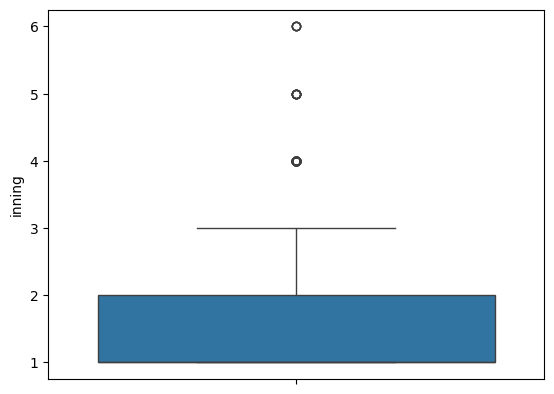

In [11]:
sns.boxplot(deliveries["inning"])
# lets check for outliers



In [12]:
#here 4 5 and 6 are outliers lets check wether these values are valid
invalid_data

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
15417,392190,3,Kolkata Knight Riders,Rajasthan Royals,0,1,CH Gayle,Kamran Khan,BB McCullum,1,0,1,-,0,-,-,-
15418,392190,3,Kolkata Knight Riders,Rajasthan Royals,0,2,BB McCullum,Kamran Khan,CH Gayle,1,0,1,-,0,-,-,-
15419,392190,3,Kolkata Knight Riders,Rajasthan Royals,0,3,CH Gayle,Kamran Khan,BB McCullum,0,1,1,wides,0,-,-,-
15420,392190,3,Kolkata Knight Riders,Rajasthan Royals,0,4,CH Gayle,Kamran Khan,BB McCullum,4,0,4,-,0,-,-,-
15421,392190,3,Kolkata Knight Riders,Rajasthan Royals,0,5,CH Gayle,Kamran Khan,BB McCullum,4,0,4,-,0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198500,1254077,4,Delhi Capitals,Sunrisers Hyderabad,0,2,S Dhawan,Rashid Khan,RR Pant,0,1,1,legbyes,0,-,-,-
198501,1254077,4,Delhi Capitals,Sunrisers Hyderabad,0,3,RR Pant,Rashid Khan,S Dhawan,4,0,4,-,0,-,-,-
198502,1254077,4,Delhi Capitals,Sunrisers Hyderabad,0,4,RR Pant,Rashid Khan,S Dhawan,0,0,0,-,0,-,-,-
198503,1254077,4,Delhi Capitals,Sunrisers Hyderabad,0,5,RR Pant,Rashid Khan,S Dhawan,0,1,1,legbyes,0,-,-,-


In [13]:
invalid_data[["inning","batting_team","bowling_team","over","ball","extras_type","total_runs"]].head(10)

,inning,batting_team,bowling_team,over,ball,extras_type,total_runs
15417,3,Kolkata Knight Riders,Rajasthan Royals,0,1,-,1
15418,3,Kolkata Knight Riders,Rajasthan Royals,0,2,-,1
15419,3,Kolkata Knight Riders,Rajasthan Royals,0,3,wides,1
15420,3,Kolkata Knight Riders,Rajasthan Royals,0,4,-,4
15421,3,Kolkata Knight Riders,Rajasthan Royals,0,5,-,4
15422,3,Kolkata Knight Riders,Rajasthan Royals,0,6,-,4
15423,3,Kolkata Knight Riders,Rajasthan Royals,0,7,-,0
15424,4,Rajasthan Royals,Kolkata Knight Riders,0,1,-,6
15425,4,Rajasthan Royals,Kolkata Knight Riders,0,2,-,2
15426,4,Rajasthan Royals,Kolkata Knight Riders,0,3,-,6


In [14]:
# for a particular match if the runs in third inning is not equal to runs in 4th innings then 5 th over should not be there, we can remove for that
inningoutcheck=invalid_data.groupby(["match_id","inning"])["total_runs"].agg("sum").reset_index()
inningoutcheck.columns=["match_id","inning","total"]
inningoutcheck.set_index("match_id")

#def check(object):
 
 #if object["match_id"][0]["total"]==object["match_id"][1]["total"]:
  #  object.drop()

print(inningoutcheck.columns)

inningoutcheck_filtered = inningoutcheck[(inningoutcheck["inning"] == 5) | (inningoutcheck["inning"] == 6) ]
print(inningoutcheck_filtered)
 # only two rows contain 5 and 6 
inningoutcheck[inningoutcheck["match_id"]==1216517]

# let's pass these id's and check if score in inning 3 is not equal to inning 6, if not equal then we will drop these rows

Index(['match_id', 'inning', 'total'], dtype='object')
    match_id  inning  total
24   1216517       5     11
25   1216517       6     15


,match_id,inning,total
22,1216517,3,5
23,1216517,4,5
24,1216517,5,11
25,1216517,6,15


In [15]:
# by this it is proved that 5 and 6 can be kept and not dropped
deliveries[(deliveries["inning"] == 5) | (deliveries["inning"] == 6)]





,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
185372,1216517,5,Mumbai Indians,Kings XI Punjab,0,1,KA Pollard,CJ Jordan,HH Pandya,1,0,1,-,0,-,-,-
185373,1216517,5,Mumbai Indians,Kings XI Punjab,0,2,HH Pandya,CJ Jordan,KA Pollard,0,1,1,wides,0,-,-,-
185374,1216517,5,Mumbai Indians,Kings XI Punjab,0,3,HH Pandya,CJ Jordan,KA Pollard,1,0,1,-,0,-,-,-
185375,1216517,5,Mumbai Indians,Kings XI Punjab,0,4,KA Pollard,CJ Jordan,HH Pandya,4,0,4,-,0,-,-,-
185376,1216517,5,Mumbai Indians,Kings XI Punjab,0,5,KA Pollard,CJ Jordan,HH Pandya,0,1,1,wides,0,-,-,-
185377,1216517,5,Mumbai Indians,Kings XI Punjab,0,6,KA Pollard,CJ Jordan,HH Pandya,1,0,1,-,1,HH Pandya,run out,-
185378,1216517,5,Mumbai Indians,Kings XI Punjab,0,7,KA Pollard,CJ Jordan,SA Yadav,0,0,0,-,0,-,-,-
185379,1216517,5,Mumbai Indians,Kings XI Punjab,0,8,KA Pollard,CJ Jordan,SA Yadav,2,0,2,-,0,-,-,-
185380,1216517,6,Kings XI Punjab,Mumbai Indians,0,1,CH Gayle,TA Boult,MA Agarwal,6,0,6,-,0,-,-,-
185381,1216517,6,Kings XI Punjab,Mumbai Indians,0,2,CH Gayle,TA Boult,MA Agarwal,1,0,1,-,0,-,-,-


In [16]:
# group by was not very much needed we can skip that step
deliveries.describe()


,inning,over,ball,batsman_runs,extra_runs,total_runs
count,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807
std,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000
75%,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000
max,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000


<Axes: >

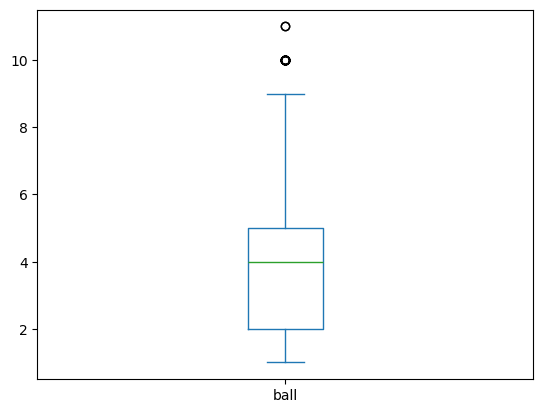

In [17]:
deliveries["ball"].plot(kind="box")


In [18]:
# let's check for ball outliers
from scipy.stats import zscore
deliveries["zscore"]=zscore(deliveries["ball"])
deliveries[deliveries["zscore"].abs()>3]





,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore
5640,336005,2,Rajasthan Royals,Chennai Super Kings,6,10,GC Smith,JA Morkel,SA Asnodkar,0,4,4,legbyes,0,-,-,-,3.51284
9806,336024,1,Mumbai Indians,Deccan Chargers,18,10,PR Shah,DP Vijaykumar,YV Takawale,1,0,1,-,0,-,-,-,3.51284
35742,419141,2,Deccan Chargers,Rajasthan Royals,1,10,AC Gilchrist,SR Watson,VVS Laxman,4,0,4,-,0,-,-,-,3.51284
38316,419152,1,Mumbai Indians,Delhi Daredevils,3,10,SR Tendulkar,PJ Sangwan,C Madan,1,0,1,-,0,-,-,-,3.51284
65352,548334,1,Mumbai Indians,Kings XI Punjab,19,10,NLTC Perera,P Awana,AT Rayudu,1,0,1,-,0,-,-,-,3.51284
72763,548367,1,Royal Challengers Bangalore,Mumbai Indians,4,10,SS Tiwary,MM Patel,TM Dilshan,6,0,6,-,0,-,-,-,3.51284
96804,729297,1,Chennai Super Kings,Rajasthan Royals,16,10,R Ashwin,DS Kulkarni,RA Jadeja,0,0,0,-,0,-,-,-,3.51284
112920,829737,2,Royal Challengers Bangalore,Mumbai Indians,5,10,V Kohli,JJ Bumrah,CH Gayle,0,0,0,-,0,-,-,-,3.51284
140313,1082606,2,Mumbai Indians,Gujarat Lions,2,10,JC Buttler,P Kumar,N Rana,0,0,0,-,0,-,-,-,3.51284
186497,1216522,2,Royal Challengers Bangalore,Rajasthan Royals,8,10,V Kohli,R Tewatia,D Padikkal,0,0,0,-,0,-,-,-,3.51284


In [19]:
#let's check wherver the ouotliers are present are those values legit
# outlier values for balls is 10 and 11 let's check for those
# Filtering all rows of match IDs with ball 10 or 11 and containing those overs


filtered_data = deliveries[deliveries['ball'].isin([10, 11])]
match_over_pairs = filtered_data[['match_id', 'over']].drop_duplicates() # this give a data frame containing match id and over values


filtered_rows = deliveries.merge(match_over_pairs, on=['match_id', 'over']) ### IN INNER JOIN EACH ROW OF LEFT COLUMN APPEARS IN SAME NO OF TIMES THE 
### MATCHING ROW IS PRESENT IN THE RIGHT SIDE MERGED DATA FRAME
#If match_over_pairs contains duplicates, each matching row in deliveries will join with all duplicate rows.

#For (1, 6) in deliveries:
#It matches both rows (1, 6) in match_over_pairs.
#This causes the rows from deliveries with (1, 6) to appear twice in the result.

# Display the first 20 rows
filtered_rows.head(10)


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore
0,336005,1,Chennai Super Kings,Rajasthan Royals,6,1,SK Raina,MM Patel,MS Dhoni,1,0,1,-,0,-,-,-,-1.446064
1,336005,1,Chennai Super Kings,Rajasthan Royals,6,2,MS Dhoni,MM Patel,SK Raina,1,0,1,-,0,-,-,-,-0.895075
2,336005,1,Chennai Super Kings,Rajasthan Royals,6,3,SK Raina,MM Patel,MS Dhoni,0,0,0,-,0,-,-,-,-0.344085
3,336005,1,Chennai Super Kings,Rajasthan Royals,6,4,SK Raina,MM Patel,MS Dhoni,1,0,1,-,0,-,-,-,0.206904
4,336005,1,Chennai Super Kings,Rajasthan Royals,6,5,MS Dhoni,MM Patel,SK Raina,0,0,0,-,0,-,-,-,0.757893
5,336005,1,Chennai Super Kings,Rajasthan Royals,6,6,MS Dhoni,MM Patel,SK Raina,0,0,0,-,0,-,-,-,1.308883
6,336005,2,Rajasthan Royals,Chennai Super Kings,6,1,GC Smith,JA Morkel,SA Asnodkar,0,0,0,-,0,-,-,-,-1.446064
7,336005,2,Rajasthan Royals,Chennai Super Kings,6,2,GC Smith,JA Morkel,SA Asnodkar,1,0,1,-,0,-,-,-,-0.895075
8,336005,2,Rajasthan Royals,Chennai Super Kings,6,3,SA Asnodkar,JA Morkel,GC Smith,0,1,1,wides,0,-,-,-,-0.344085
9,336005,2,Rajasthan Royals,Chennai Super Kings,6,4,SA Asnodkar,JA Morkel,GC Smith,0,0,0,-,0,-,-,-,0.206904


In [20]:
# in this data let's group  by the overs and match id with aggrgation function on extras to check if the number of extras+ 6 is number of bowls bowled
 # because if not then that data is invalid
 # let's describe the data first
filtered_rows.describe()

,inning,over,ball,batsman_runs,extra_runs,total_runs,zscore
count,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000,477.000000
mean,1.503145,10.861635,4.855346,1.092243,0.345912,1.438155,0.678191
std,0.500515,6.607684,2.720533,1.686539,0.631665,1.616242,1.498985
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-1.446064
25%,1.000000,4.000000,3.000000,0.000000,0.000000,0.000000,-0.344085
50%,2.000000,12.000000,5.000000,0.000000,0.000000,1.000000,0.757893
75%,2.000000,17.000000,7.000000,1.000000,1.000000,1.000000,1.859872
max,2.000000,19.000000,11.000000,6.000000,5.000000,7.000000,4.063830


In [21]:
filtered_extra_runs = filtered_rows[filtered_rows['extra_runs'] != '-']

filtered_extra_runs.groupby(["match_id","over"])[["ball","extra_runs"]].agg(["count"])

,,ball,extra_runs
,,count,count
match_id,over,,
336005,6,16,16
336024,18,16,16
419141,1,16,16
419152,3,16,16
548334,19,13,13
548367,4,17,17
729297,16,16,16
829737,5,16,16


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore
1539,335988,1,Deccan Chargers,Delhi Daredevils,19,6,WPUJC Vaas,VY Mahesh,RP Singh,6,1,7,noballs,0,-,-,-,1.308883,3.484474
4675,336001,2,Delhi Daredevils,Chennai Super Kings,6,3,V Sehwag,Joginder Sharma,G Gambhir,6,1,7,noballs,0,-,-,-,-0.344085,3.484474
9308,336021,2,Mumbai Indians,Kolkata Knight Riders,5,3,ST Jayasuriya,I Sharma,DJ Thornely,6,1,7,noballs,0,-,-,-,-0.344085,3.484474
10814,336028,2,Mumbai Indians,Kings XI Punjab,19,1,SD Chitnis,VRV Singh,CRD Fernando,6,1,7,noballs,0,-,-,-,-1.446064,3.484474
11796,336033,2,Chennai Super Kings,Rajasthan Royals,18,5,JA Morkel,MM Patel,MS Gony,6,1,7,noballs,0,-,-,-,0.757893,3.484474
15389,392190,2,Kolkata Knight Riders,Rajasthan Royals,15,6,SC Ganguly,MM Patel,Yashpal Singh,6,1,7,noballs,0,-,-,-,1.308883,3.484474
22685,392221,2,Royal Challengers Bangalore,Kolkata Knight Riders,17,6,MV Boucher,I Sharma,LRPL Taylor,6,1,7,noballs,0,-,-,-,1.308883,3.484474
24770,392230,1,Delhi Daredevils,Rajasthan Royals,18,2,AB de Villiers,MM Patel,KD Karthik,6,1,7,noballs,0,-,-,-,-0.895075,3.484474
26842,392238,2,Royal Challengers Bangalore,Chennai Super Kings,18,1,LRPL Taylor,JDP Oram,V Kohli,6,1,7,noballs,0,-,-,-,-1.446064,3.484474
33254,419131,1,Delhi Daredevils,Kolkata Knight Riders,13,6,DA Warner,AB Agarkar,PD Collingwood,6,1,7,noballs,0,-,-,-,1.308883,3.484474


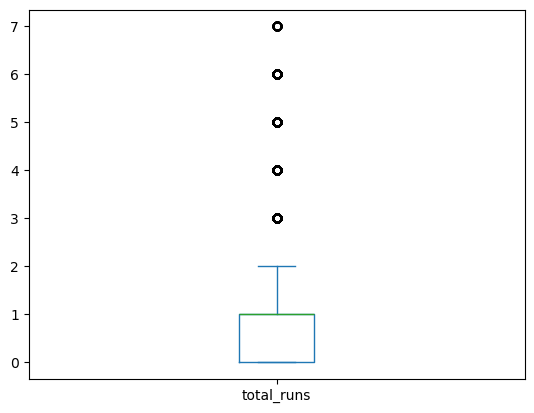

In [22]:
# amazing!!! from this data we can see that the outliers in balls is justified so we can't remove them
# now let's check for runs columns
deliveries["total_runs"].plot(kind="box")
# let's check outlier data
deliveries["runs_zscore"]=zscore(deliveries["total_runs"])
deliveries[deliveries["runs_zscore"].abs()>3].head(20)

In [23]:
# let's create a checkequal column to see if  batsman runs + extas is equal to total runs, because if it is not then those rows are to be replaced,
# but instead of replacing the first let's identify them later we will see how to replace them

deliveries["checktotal"]=(deliveries["batsman_runs"]+deliveries["extra_runs"])==(deliveries["total_runs"])
deliveries[deliveries["checktotal"]==False]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal


In [24]:
# we see that there is not such data so the ouotliers are justified
deliveries["extras_type"].unique()


array(['legbyes', '-', 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [25]:
# for the ball next to no ball there shoud'nt be any player dismissal
# let's check for no ball data
deliveries[(deliveries["extras_type"]=='noballs')&(deliveries["dismissal_kind"]!="-")]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal
24387,392228,2,Deccan Chargers,Kolkata Knight Riders,17,1,A Symonds,Mashrafe Mortaza,RG Sharma,0,1,1,noballs,1,A Symonds,run out,Mashrafe Mortaza,-1.446064,-0.204626,True
115702,829763,1,Royal Challengers Bangalore,Rajasthan Royals,16,3,SN Khan,SR Watson,KD Karthik,1,1,2,noballs,1,KD Karthik,run out,TG Southee,-0.344085,0.410224,True
116439,829769,2,Rajasthan Royals,Mumbai Indians,19,5,STR Binny,R Vinay Kumar,TG Southee,1,1,2,noballs,1,TG Southee,run out,KA Pollard,0.757893,0.410224,True
167425,1175366,2,Royal Challengers Bangalore,Sunrisers Hyderabad,18,5,Mohammed Siraj,V Shankar,C de Grandhomme,0,1,1,noballs,1,C de Grandhomme,run out,-,0.757893,-0.204626,True
179428,1216493,1,Delhi Capitals,Kings XI Punjab,19,7,MP Stoinis,CJ Jordan,K Rabada,1,1,2,noballs,1,MP Stoinis,run out,-,1.859872,0.410224,True
210216,1304055,2,Mumbai Indians,Rajasthan Royals,18,9,KA Pollard,M Prasidh Krishna,M Ashwin,0,1,1,noballs,1,M Ashwin,run out,SV Samson,2.961851,-0.204626,True
220309,1304097,1,Mumbai Indians,Gujarat Titans,18,3,Tilak Varma,LH Ferguson,TH David,0,1,1,noballs,1,Tilak Varma,run out,HH Pandya,-0.344085,-0.204626,True
224880,1304116,1,Sunrisers Hyderabad,Punjab Kings,19,6,R Shepherd,NT Ellis,B Kumar,0,1,1,noballs,1,B Kumar,run out,JM Sharma,1.308883,-0.204626,True
225101,1312197,1,Rajasthan Royals,Gujarat Titans,19,6,JC Buttler,Yash Dayal,R Parag,1,1,2,noballs,1,JC Buttler,run out,WP Saha,1.308883,0.410224,True
236509,1359518,1,Delhi Capitals,Gujarat Titans,1,2,PK Garg,HH Pandya,DA Warner,0,1,1,noballs,1,DA Warner,run out,Rashid Khan,-0.895075,-0.204626,True


In [26]:
# runout in noball is valid 
# the feilder who did runout is missing we need to fill that data
# let's check dismissal kind column
deliveries["dismissal_kind"].unique()

array(['-', 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [27]:
#for caught,runout,stumped,caught and bowled the fielder should be present,that data needs to be filled
deliveries[deliveries["dismissal_kind"].isin(['caught','run out','stumped', 'caught and bowled'])&(deliveries["fielder"]!="-")]




,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal
33,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,5,2,SC Ganguly,Z Khan,BB McCullum,0,0,0,-,1,SC Ganguly,caught,JH Kallis,-0.895075,-0.819476,True
74,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,12,1,RT Ponting,JH Kallis,BB McCullum,0,0,0,-,1,RT Ponting,caught,P Kumar,-1.446064,-0.819476,True
106,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,17,1,DJ Hussey,AA Noffke,BB McCullum,0,0,0,-,1,DJ Hussey,caught,CL White,-1.446064,-0.819476,True
154,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,4,5,JH Kallis,AB Agarkar,W Jaffer,0,0,0,-,1,JH Kallis,caught,M Kartik,0.757893,-0.819476,True
157,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,5,2,W Jaffer,AB Dinda,CL White,0,0,0,-,1,W Jaffer,caught,RT Ponting,-0.895075,-0.819476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260802,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,10,2,AK Markram,AD Russell,H Klaasen,0,0,0,-,1,AK Markram,caught,MA Starc,-0.895075,-0.819476,True
260811,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,11,5,Shahbaz Ahmed,CV Varun,H Klaasen,0,0,0,-,1,Shahbaz Ahmed,caught,SP Narine,0.757893,-0.819476,True
260817,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,12,5,Abdul Samad,AD Russell,H Klaasen,0,0,0,-,1,Abdul Samad,caught,Rahmanullah Gurbaz,0.757893,-0.819476,True
260852,1426312,1,Sunrisers Hyderabad,Kolkata Knight Riders,18,3,PJ Cummins,AD Russell,B Kumar,0,0,0,-,1,PJ Cummins,caught,MA Starc,-0.344085,-0.819476,True


In [28]:
# for each type of dismissal we need to fill the missing fielder value
deliveries[(deliveries["dismissal_kind"]=="caught")&(deliveries["fielder"]=="-")]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal


In [29]:
deliveries[(deliveries["dismissal_kind"]=='run out')&(deliveries["fielder"]=="-")] 
#for runout there is fielder missing values
# let's replce them with the appropriate values


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal
496,335984,1,Rajasthan Royals,Delhi Daredevils,3,5,YK Pathan,B Geeves,SR Watson,0,0,0,-,1,YK Pathan,run out,-,0.757893,-0.819476,True
511,335984,1,Rajasthan Royals,Delhi Daredevils,6,2,SR Watson,R Bhatia,M Kaif,1,0,1,-,1,SR Watson,run out,-,-0.895075,-0.204626,True
61511,548318,1,Royal Challengers Bangalore,Chennai Super Kings,19,4,RR Bhatkal,DE Bollinger,DL Vettori,0,0,0,-,1,DL Vettori,run out,-,0.206904,-0.819476,True
113503,829741,3,Kings XI Punjab,Rajasthan Royals,0,7,SE Marsh,CH Morris,GJ Maxwell,0,1,1,legbyes,1,SE Marsh,run out,-,1.859872,-0.204626,True
113507,829741,4,Rajasthan Royals,Kings XI Punjab,0,4,JP Faulkner,MG Johnson,SPD Smith,0,0,0,-,1,JP Faulkner,run out,-,0.206904,-0.819476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198220,1254076,2,Royal Challengers Bangalore,Chennai Super Kings,15,6,KA Jamieson,DJ Bravo,YS Chahal,0,0,0,-,1,KA Jamieson,run out,-,1.308883,-0.819476,True
198315,1254077,1,Delhi Capitals,Sunrisers Hyderabad,11,3,RR Pant,J Suchith,PP Shaw,0,0,0,-,1,PP Shaw,run out,-,-0.344085,-0.819476,True
198387,1254077,2,Sunrisers Hyderabad,Delhi Capitals,3,2,JM Bairstow,R Ashwin,DA Warner,0,0,0,-,1,DA Warner,run out,-,-0.895075,-0.819476,True
198714,1254078,2,Kolkata Knight Riders,Punjab Kings,14,1,EJG Morgan,Ravi Bishnoi,AD Russell,0,0,0,-,1,AD Russell,run out,-,-1.446064,-0.819476,True


In [30]:
# APPROACH- group the match id and innings where there is runnout and fielder has - value and replace it with the mode of of this group
run_outs=deliveries[deliveries["dismissal_kind"]=="run out"]

# Group by match_id and inning, and calculate the mode for fielder
mode_fielders=(run_outs[run_outs["fielder"]!="-"].groupby(["match_id","inning"])["fielder"].agg(lambda x:x.mode()[0] if not x.mode().empty else "-").reset_index().rename(columns={"fielder": "mode_fielder"}))
mode_fielders

,match_id,inning,mode_fielder
0,335982,2,AB Agarkar
1,335985,1,Z Khan
2,335986,1,Mohammad Hafeez
3,335987,1,RA Jadeja
4,335988,1,MK Tiwary
...,...,...,...
709,1426306,2,Swapnil Singh
710,1426307,1,Nithish Kumar Reddy
711,1426309,1,Rahmanullah Gurbaz
712,1426310,2,V Kohli


In [31]:
#merging the two data frames
deliveries = deliveries.merge(mode_fielders, on=["match_id", "inning"], how="left")
deliveries.loc[
    (deliveries["dismissal_kind"] == "run out") & (deliveries["fielder"] == "-"),
    "fielder",
] = deliveries["mode_fielder"]
# Drop the temporary 'mode_fielder' column
deliveries = deliveries.drop(columns=["mode_fielder"])
deliveries[(deliveries["dismissal_kind"] == "run out") & (deliveries["fielder"] == "-")]
# we succesfully replaced those columns of runout

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal


In [32]:
deliveries[(deliveries["dismissal_kind"]=="stumped")&(deliveries["fielder"]=="-")]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal


In [33]:
deliveries[(deliveries["dismissal_kind"]=="caught and bowled")&(deliveries["fielder"]=="-")]


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal
869,335985,2,Royal Challengers Bangalore,Mumbai Indians,8,6,R Dravid,Harbhajan Singh,LRPL Taylor,0,0,0,-,1,R Dravid,caught and bowled,-,1.308883,-0.819476,True
1216,335987,1,Kings XI Punjab,Rajasthan Royals,6,3,KC Sangakkara,SK Warne,JR Hopes,0,0,0,-,1,KC Sangakkara,caught and bowled,-,-0.344085,-0.819476,True
1317,335987,2,Rajasthan Royals,Kings XI Punjab,2,3,YK Pathan,B Lee,Kamran Akmal,0,0,0,-,1,YK Pathan,caught and bowled,-,-0.344085,-0.819476,True
1930,335990,1,Deccan Chargers,Rajasthan Royals,8,3,VVS Laxman,SK Warne,A Symonds,0,0,0,-,1,VVS Laxman,caught and bowled,-,-0.344085,-0.819476,True
2266,335991,2,Mumbai Indians,Kings XI Punjab,2,3,ST Jayasuriya,B Lee,L Ronchi,0,0,0,-,1,ST Jayasuriya,caught and bowled,-,-0.344085,-0.819476,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253750,1426279,2,Sunrisers Hyderabad,Royal Challengers Bengaluru,9,1,Abdul Samad,KV Sharma,Shahbaz Ahmed,0,0,0,-,1,Abdul Samad,caught and bowled,-,-1.446064,-0.819476,True
256057,1426289,1,Kolkata Knight Riders,Mumbai Indians,6,1,RK Singh,PP Chawla,VR Iyer,0,0,0,-,1,RK Singh,caught and bowled,-,-1.446064,-0.819476,True
256933,1426292,2,Lucknow Super Giants,Kolkata Knight Riders,13,6,AJ Turner,CV Varun,KH Pandya,0,0,0,-,1,AJ Turner,caught and bowled,-,1.308883,-0.819476,True
258449,1426299,2,Chennai Super Kings,Rajasthan Royals,3,4,R Ravindra,R Ashwin,RD Gaikwad,0,0,0,-,1,R Ravindra,caught and bowled,-,0.206904,-0.819476,True


In [34]:
# for caught and bowled we need to replace the "-" with the corresponding bowler
deliveries.loc[(deliveries["dismissal_kind"]=="caught and bowled")&(deliveries["fielder"]=="-"),"fielder"]=deliveries["bowler"]
deliveries[(deliveries["dismissal_kind"]=="caught and bowled")&(deliveries["fielder"]=="-")]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,zscore,runs_zscore,checktotal


In [35]:
##BEAUTIFUL WE HAVE CLEANED THE DELIVERIES DATA FRAME LET'S DROP THE UNNECESSARY COLUMNS AND DISPLAY THIS BEAUTY
#deliveries.drop(["zscore","runs_zscore","checktotal","mode_fielder_x","mode_fielder_y"],axis=1,inplace=True)

# Matches dataframe


### data cleaning

In [36]:
matches.head()


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [37]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [38]:
matches["method"].unique()
## all the data types are correct no changes are needed

array([nan, 'D/L'], dtype=object)

In [39]:
matches.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


In [40]:
matches.size

21900

In [41]:
matches.shape

(1095, 20)

## filling missing values

In [42]:
matches.isnull().sum()

id                    0
season                0
city                 51
date                  0
match_type            0
player_of_match       5
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                5
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [43]:
matches[~matches["city"].isnull()]
#city data is not that relavent fro visualisation but there are very few missing values so let's replace by mode
matches["city"].fillna(matches["city"].mode()[0],inplace=True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\3628729611.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["city"].fillna(matches["city"].mode()[0],inplace=True)


In [44]:
# for player of the match fill by unknown since we can't do mode because that player must be present in one of those teams
matches["player_of_match"].fillna("unknown",inplace=True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\3755112402.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["player_of_match"].fillna("unknown",inplace=True)


In [45]:
def wincheck(object):
    if object["result"] == "runs" and object["toss_decision"] == "bat":
        return object["toss_winner"]
    elif object["result"] == "wickets" and object["toss_decision"] == "field":
        return object["toss_winner"]
    else:
        if object["toss_winner"] == object["team1"]:
            return object["team2"]
        else:
            return object["team1"]


matches.loc[matches["winner"].isnull(), "winner"] = matches[matches["winner"].isnull()].apply(wincheck, axis=1)
#matches[matches["winner"].isnull()] filters the DataFrame to include only the rows where winner is missing.
#.apply(wincheck, axis=1) then applies the wincheck function to each of these filtered rows, and the result is a pandas 
# Series with the calculated winner for each row.
# After executing matches[matches["winner"].isnull()].apply(wincheck, axis=1), it will return a Series like this:
# 0    Team A
#1    Team D
# dtype: object
# assign it to the data frame using the iloc


# Efficiently filling missing 'winner' based on conditions
matches['winner'] = np.where(
    (matches['result'] == 'runs') & (matches['toss_decision'] == 'bat'),
    matches['toss_winner'],
    np.where(
        (matches['result'] == 'wickets') & (matches['toss_decision'] == 'field'),
        matches['toss_winner'],
        np.where(
            matches['toss_winner'] == matches['team1'],
            matches['team2'],
            matches['team1']
        )
    )
)
# this is directly applied on winner row instead of checking for EACH ROW making it more efficient
# np.where(condition, if true, if false) SYNTAX


In [46]:
matches.isna().sum()

id                    0
season                0
city                  0
date                  0
match_type            0
player_of_match       0
venue                 0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin        19
target_runs           3
target_overs          3
super_over            0
method             1074
umpire1               0
umpire2               0
dtype: int64

In [47]:
matches[matches["result_margin"].isna()]


,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
66,392190,2009,Cape Town,2009-04-23,League,YK Pathan,Newlands,Kolkata Knight Riders,Rajasthan Royals,Kolkata Knight Riders,field,Rajasthan Royals,tie,NaN,151.0,20.0,Y,NaN,MR Benson,M Erasmus
130,419121,2009/10,Chennai,2010-03-21,League,J Theron,"MA Chidambaram Stadium, Chepauk",Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,field,Kings XI Punjab,tie,NaN,137.0,20.0,Y,NaN,K Hariharan,DJ Harper
241,501265,2011,Delhi,2011-05-21,League,unknown,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,Pune Warriors,no result,NaN,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
328,598004,2013,Hyderabad,2013-04-07,League,GH Vihari,"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,bat,Sunrisers Hyderabad,tie,NaN,131.0,20.0,Y,NaN,AK Chaudhary,S Ravi
342,598017,2013,Bangalore,2013-04-16,League,V Kohli,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Delhi Daredevils,tie,NaN,153.0,20.0,Y,NaN,M Erasmus,VA Kulkarni
416,729315,2014,Abu Dhabi,2014-04-29,League,JP Faulkner,Sheikh Zayed Stadium,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Kolkata Knight Riders,tie,NaN,153.0,20.0,Y,NaN,Aleem Dar,AK Chaudhary
475,829741,2015,Ahmedabad,2015-04-21,League,SE Marsh,"Sardar Patel Stadium, Motera",Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,field,Rajasthan Royals,tie,NaN,192.0,20.0,Y,NaN,M Erasmus,S Ravi
485,829763,2015,Bangalore,2015-04-29,League,unknown,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Royal Challengers Bangalore,no result,NaN,NaN,NaN,N,NaN,JD Cloete,PG Pathak
511,829813,2015,Bangalore,2015-05-17,League,unknown,M Chinnaswamy Stadium,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,field,Delhi Daredevils,no result,NaN,188.0,20.0,N,NaN,HDPK Dharmasena,K Srinivasan
610,1082625,2017,Rajkot,2017-04-29,League,KH Pandya,Saurashtra Cricket Association Stadium,Gujarat Lions,Mumbai Indians,Gujarat Lions,bat,Mumbai Indians,tie,NaN,154.0,20.0,Y,NaN,AK Chaudhary,CB Gaffaney


In [48]:
# from the above table we observed that result margin is null when match ties or result is inconclusive 
# let's replace the values with -
matches["result_margin"].fillna(0,inplace=True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\3640174617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["result_margin"].fillna(0,inplace=True)


In [49]:
matches[matches["target_runs"].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
241,501265,2011,Delhi,2011-05-21,League,unknown,Feroz Shah Kotla,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,Pune Warriors,no result,0.0,NaN,NaN,N,NaN,SS Hazare,RJ Tucker
485,829763,2015,Bangalore,2015-04-29,League,unknown,M Chinnaswamy Stadium,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Royal Challengers Bangalore,no result,0.0,NaN,NaN,N,NaN,JD Cloete,PG Pathak
994,1359519,2023,Lucknow,2023-05-03,League,unknown,Bharat Ratna Shri Atal Bihari Vajpayee Ekana C...,Lucknow Super Giants,Chennai Super Kings,Chennai Super Kings,field,Lucknow Super Giants,no result,0.0,NaN,NaN,N,NaN,AK Chaudhary,NA Patwardhan


In [50]:
# this happened when there is no result, this applies to target overs also, replacing both of them by "-"
matches[["target_runs","target_overs"]]=matches[["target_runs","target_overs"]].fillna(0)

In [51]:
matches[~matches["method"].isna()]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,bat,Delhi Daredevils,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan
60,392183,2009,Cape Town,2009-04-19,League,DL Vettori,Newlands,Delhi Daredevils,Kings XI Punjab,Delhi Daredevils,field,Delhi Daredevils,wickets,10.0,54.0,6.0,N,D/L,MR Benson,SD Ranade
63,392186,2009,Durban,2009-04-21,League,CH Gayle,Kingsmead,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,Kings XI Punjab,runs,11.0,69.0,9.2,N,D/L,DJ Harper,SD Ranade
89,392214,2009,Centurion,2009-05-07,League,ML Hayden,SuperSport Park,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Chennai Super Kings,runs,12.0,187.0,18.0,N,D/L,DJ Harper,TH Wijewardene
192,501215,2011,Kochi,2011-04-18,League,BB McCullum,Nehru Stadium,Kochi Tuskers Kerala,Chennai Super Kings,Kochi Tuskers Kerala,field,Kochi Tuskers Kerala,wickets,7.0,135.0,17.0,N,D/L,K Hariharan,AL Hill
221,501245,2011,Kolkata,2011-05-07,League,Iqbal Abdulla,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,10.0,52.0,10.0,N,D/L,Asad Rauf,PR Reiffel
231,501255,2011,Bangalore,2011-05-14,League,CH Gayle,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,4.0,102.0,13.0,N,D/L,RE Koertzen,RB Tiffin
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford
476,829743,2015,Visakhapatnam,2015-04-22,League,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,118.0,12.0,N,D/L,RK Illingworth,VA Kulkarni


In [52]:
# method column can be ignored but let"s replace the values with "-"
matches["method"].fillna("-",inplace=True)

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\2428298934.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches["method"].fillna("-",inplace=True)


## removing duplicates

In [53]:
matches.duplicated().sum()

0

## removing outliers

In [54]:
matches.describe()
matches["date"]=pd.to_datetime(matches["date"])
matches.describe()

,id,date,result_margin,target_runs,target_overs
count,1.095000e+03,1095,1095.000000,1095.000000,1095.000000
mean,9.048283e+05,2016-06-25 11:39:36.986301184,16.959817,165.230137,19.705205
min,3.359820e+05,2008-04-18 00:00:00,0.000000,0.000000,0.000000
25%,5.483315e+05,2012-04-21 00:00:00,5.000000,146.000000,20.000000
50%,9.809610e+05,2016-05-03 00:00:00,8.000000,166.000000,20.000000
75%,1.254062e+06,2021-04-13 12:00:00,19.000000,187.000000,20.000000
max,1.426312e+06,2024-05-26 00:00:00,146.000000,288.000000,20.000000
std,3.677402e+05,NaN,21.714792,34.487313,1.887000


In [55]:
# ignore id column and date they are sequenial and correct# 
# for result margin we need deliveries data to check properly
# let's merge these two

In [56]:
deliveries.rename(columns={"match_id":"id"},inplace=True)
combined_df=pd.merge(matches,deliveries,on="id",how="outer")
combined_df.drop(["zscore","runs_zscore","checktotal"],axis=1,inplace=True)
combined_df.head(5)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,-,-,-
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,-,-,-
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-


In [57]:
# to check wether the result margin is correct we can group match id and innings with aggregate on total runs, their difference should match the margin
margin_check=combined_df.groupby(["id","inning"])["total_runs"].agg(["sum"]).reset_index()
margin_check.columns=[["id","inning","total_runs"]]
margin_check.head()

,id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129


In [58]:
#combined_df.drop(['calculated_margin','check'],axis=1,inplace=True)

In [59]:
combined_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,-,-,-
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,-,-,-
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,VR Iyer,1,0,1,-,0,-,-,-
260916,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,AK Markram,SS Iyer,1,0,1,-,0,-,-,-
260917,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,SS Iyer,1,0,1,-,0,-,-,-
260918,1426312,2024,Chennai,2024-05-26,Final,MA Starc,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,Shahbaz Ahmed,VR Iyer,1,0,1,-,0,-,-,-


##

# VISUALISATION

+  Trends:
+ IPL Dataset: Match-winning trends by team, season, or venue.

In [60]:
combined_df.head(5)
print(combined_df.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')


### Visualization 1: Bar Plot – Number of Wins by Each Team

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\4028641900.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='team', y='wins', data=team_wins, palette='viridis')


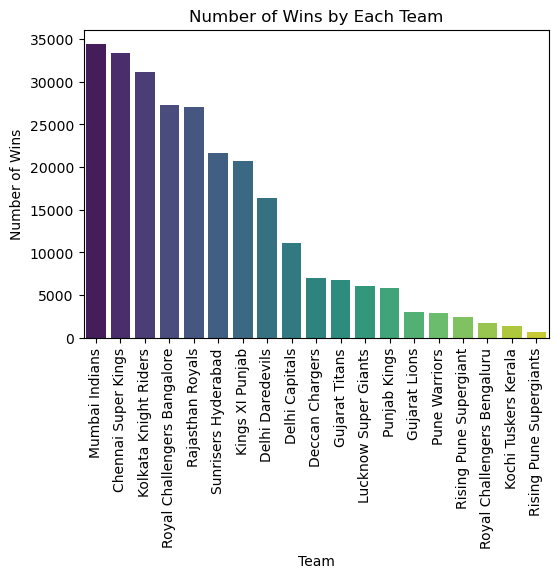

In [61]:
team_wins = combined_df['winner'].value_counts().reset_index()
team_wins.columns = ['team', 'wins']

# Plot the number of wins by each team
plt.figure(figsize=( 6,4))
sns.barplot(x='team', y='wins', data=team_wins, palette='viridis')
plt.title('Number of Wins by Each Team')
plt.xlabel('Team')
plt.ylabel('Number of Wins')
plt.xticks(rotation=90)
plt.show()

+ mumbai indians,chennai super kings,kolkata night riders have won the most number of games with more then 30000 games and mumbai indians is on top
+ gujarat lions,pune warriors,rising pune super giants, royal challengers bengaluru,kochi tuskers kerela and rising pune super giants appear to have won
+ the least amount of games below 5000

### Visualization 2: Pie Chart – Win Proportion for Each Team

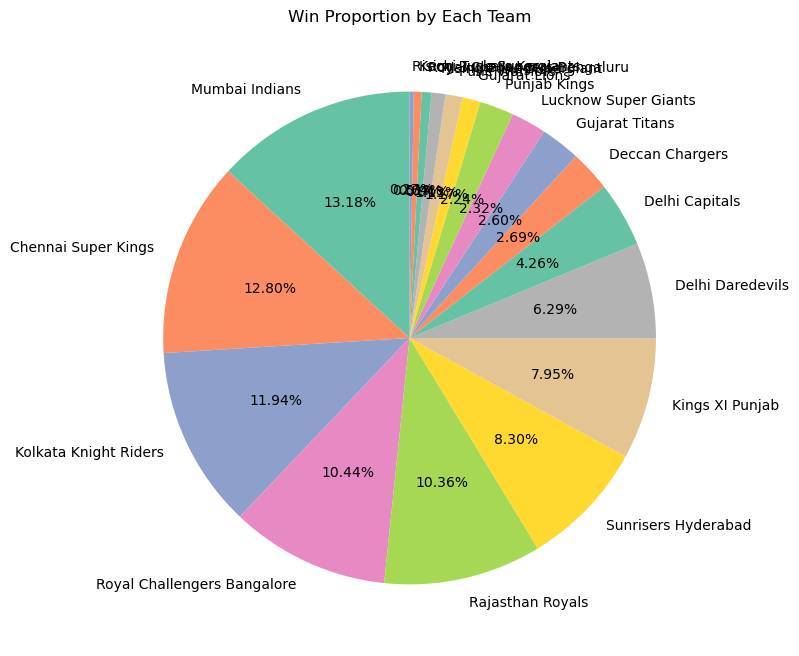

In [62]:
plt.figure(figsize=(8,8))
plt.pie(
    team_wins["wins"],  # Values for the pie chart
    labels=team_wins["team"],  # Labels for each section
    autopct="%.2f%%",  # Display percentage with 2 decimal places
    startangle=90,  # Start angle for better alignment
    colors=sns.color_palette("Set2", len(team_wins))  # Distinct colors for each team
)
plt.title('Win Proportion by Each Team')
plt.show()

### 2. Match-Winning Trends by Season

### Visualization 3: Line Plot – Number of Wins per Season

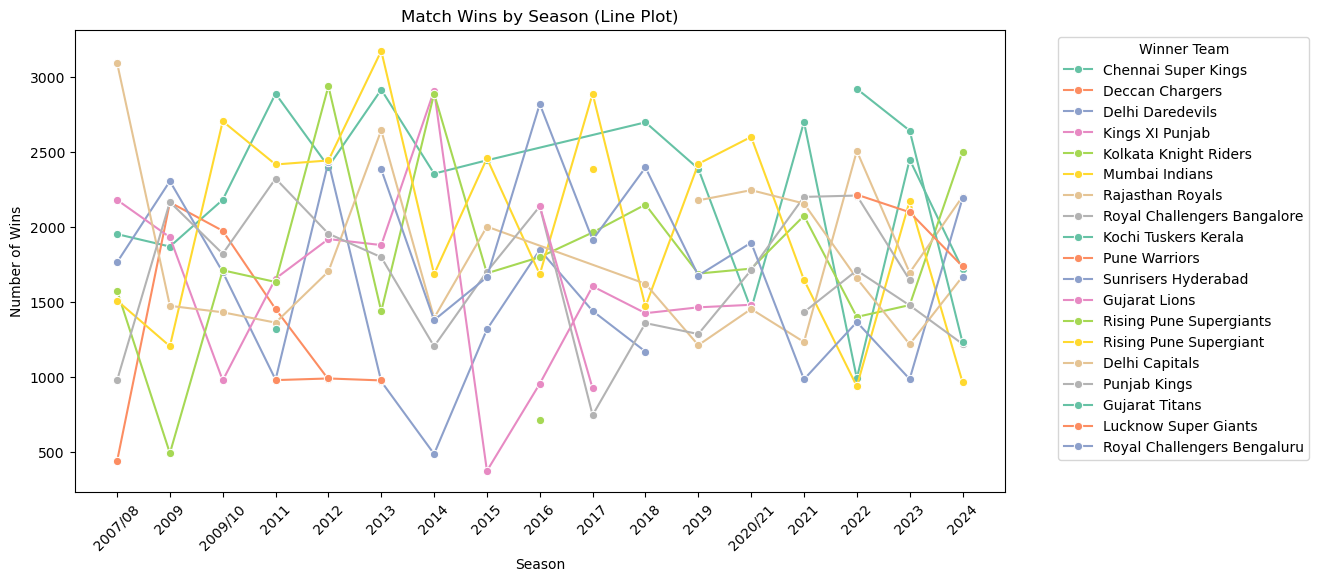

In [63]:
season_wins = combined_df.groupby(['season', 'winner']).size().reset_index(name='wins')


# Create a simple line plot to visualize wins by season
plt.figure(figsize=(12, 6))
sns.lineplot(data=season_wins, x='season', y='wins', hue='winner', marker='o', palette='Set2')

# Title and labels
plt.title('Match Wins by Season (Line Plot)')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.xticks(rotation=45)
plt.legend(title='Winner Team', loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

### Visualization 4: Stacked Bar Plot – Wins per Team in Each Season

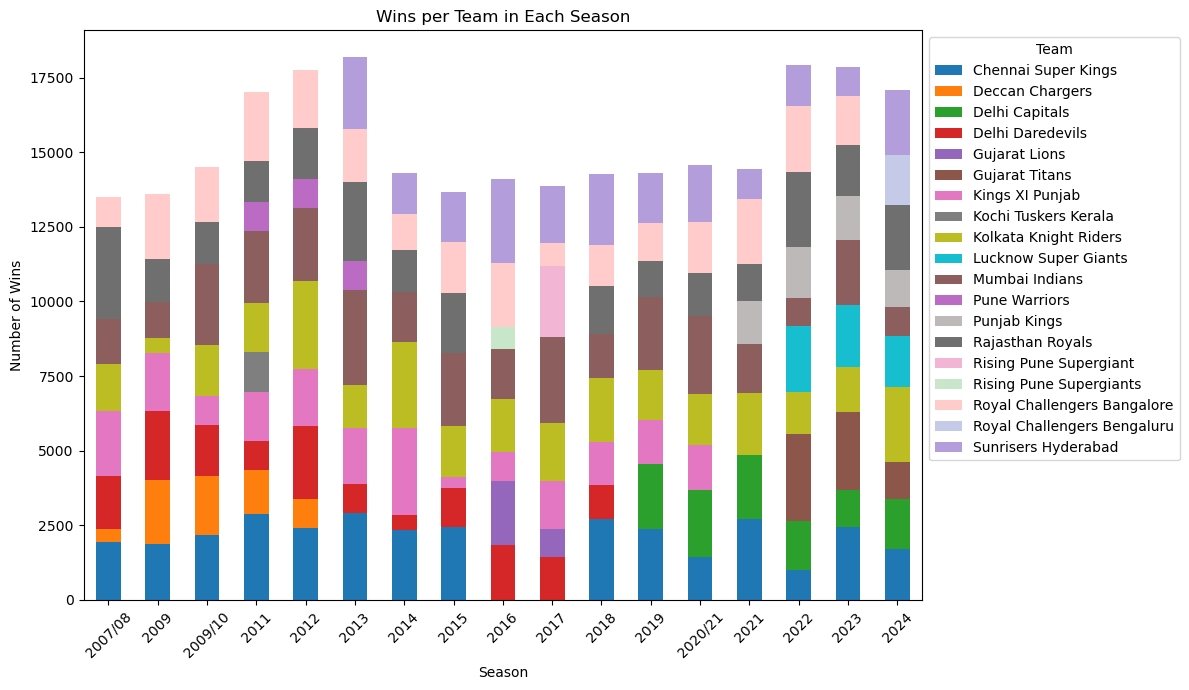

In [64]:
season_wins = combined_df.groupby(['season', 'winner']).size().unstack().fillna(0)
palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", 
    "#7f7f7f", "#bcbd22", "#17becf", "#8c5e5e", "#bc6bc5", "#bdb9b9", "#6f6f6f", 
    "#f2b5d4", "#c8e6c9", "#ffcccb", "#c5cae9", "#b39ddb"
]

# Plot stacked bar chart
season_wins.plot(kind='bar', stacked=True, figsize=(12, 7), color=palette)
plt.title('Wins per Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

+ this is the best kind of visualisation when there are many types of values in one column
+ chennai super kings have been conisstently at the bottom of the table and appear to have removed from the league in 2016 and 2017
+ deccan chargers had remained at the bottom of the table and been discontinued after 2012
+ delhi capitals started at the bottom in 2019 and remained there till 2024 
+ delhi daredevils have won consistently around 5000 games for the first 5 seasons but fell down to the bottom most and showed slight improvement in 2018
+Key Insights:
+ Dominance of Teams Over Time:

+ Teams like Chennai Super Kings (CSK), Mumbai Indians (MI), and Royal Challengers Bangalore (RCB) seem to have consistent wins throughout the seasons, especially early on.
+ CSK, in particular, appears to have dominated many seasons, especially during the 2010s. Their frequent victories could indicate strong team performance and strategic advantages during these years.
+ Emerging Teams:

+ Gujarat Titans started showing up later (around 2022), and it is possible that they had an immediate impact in the seasons they played, as evidenced by t he relatively high number of wins in the recent seasons.
+ Delhi Capitals (formerly Delhi Daredevils) seem to have picked up pace in the recent years, with noticeable wins in the last few seasons, marking a strong resurgence.
+ Decline or Absence of Some Teams:

+ Teams like Pune Warriors, Deccan Chargers, and Kochi Tuskers Kerala show up early but fade away by 2013-2014. Their absence after a few seasons reflects either poor performance or team disbandment.
Rajasthan Royals and Kings XI Punjab also show varied performance across the seasons, with fewer standout years compared to teams like MI or CSK.
+ Overall Performance Trends:

+ The chart gives an impression of IPL as a growing competition. Earlier years have fewer teams, but as more teams joined (e.g., Gujarat Titans, Lucknow Super Giants), the competition intensity seems to have increased.
+ The season-wise distribution reflects periods of dominance by certain teams and competitive parity over the years.
+ Notable Trends:

+ The legend on the right side allows easy identification of which team corresponds to each color in the bars. Teams with more colors stacked in their bars (such as Mumbai Indians and Chennai Super Kings) signify consistent wins in most seasons.
Recent Seasons (2022-2024) show more evenly distributed wins across multiple teams, possibly indicating more competitive balance among the teams.

### Visualization 5: Bar Plot – Wins by Venue

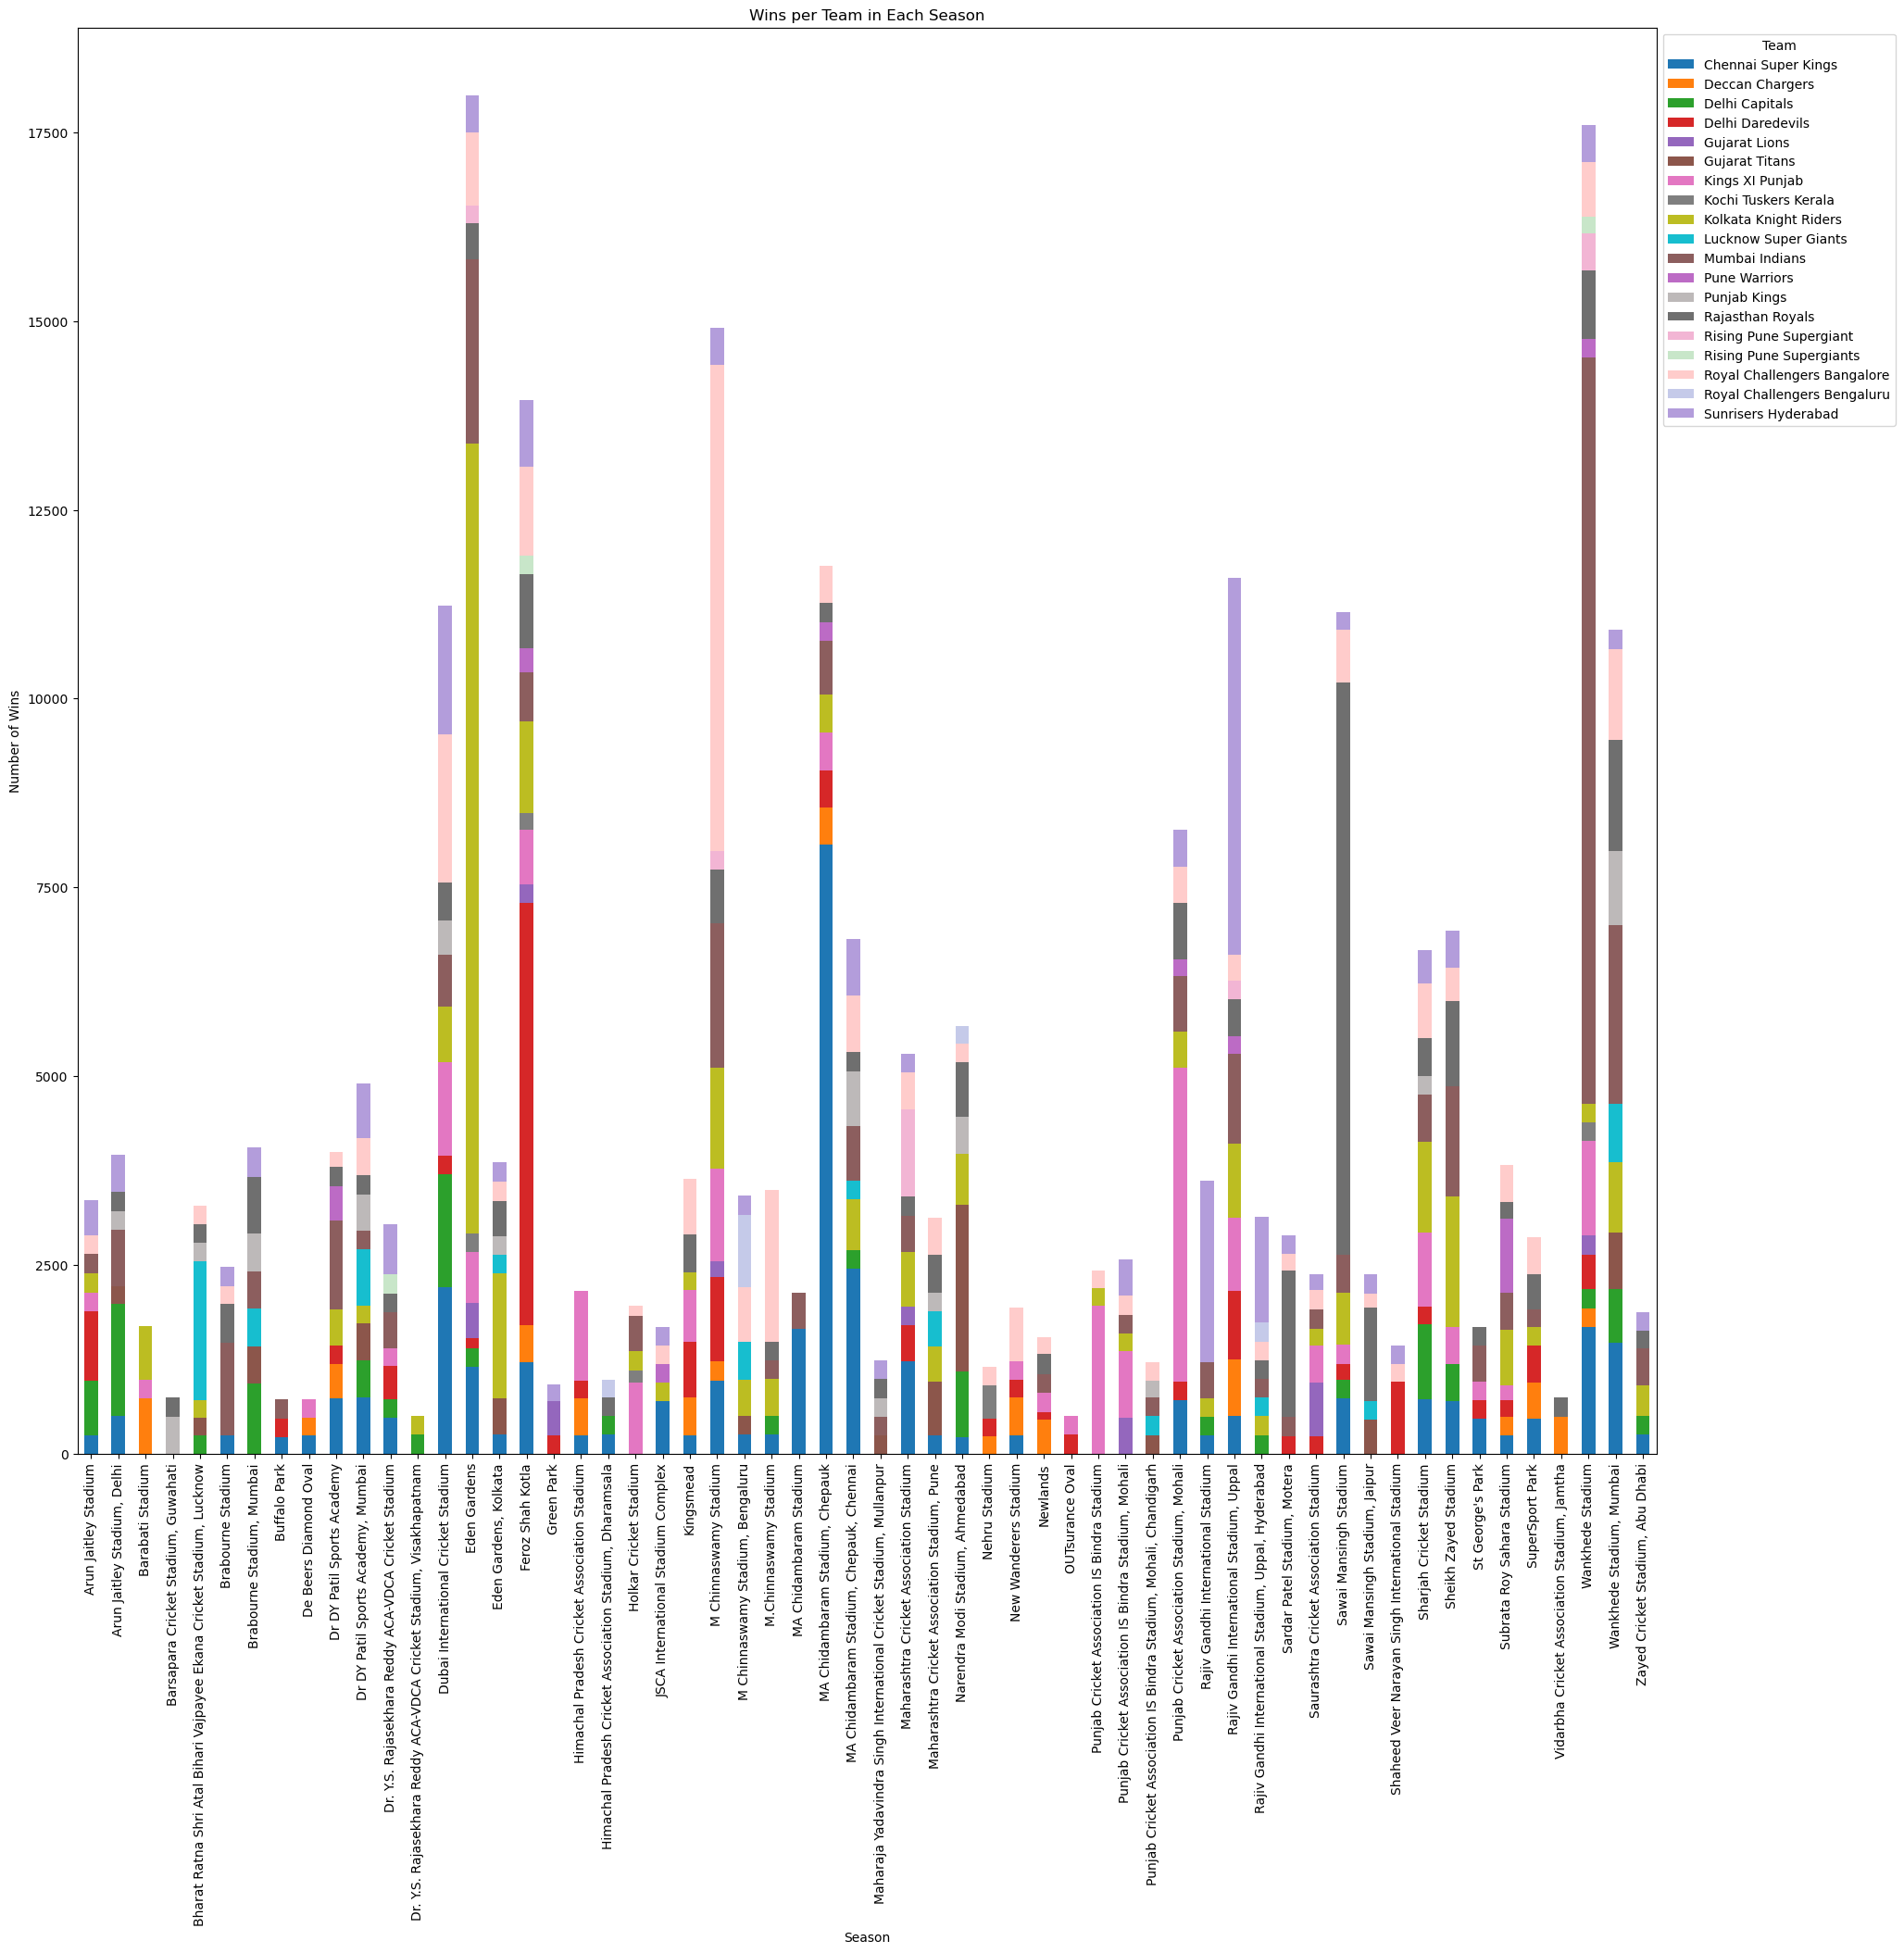

In [65]:
# Count number of wins by venue
venue_wins = combined_df.groupby(['venue', 'winner']).size().unstack().fillna(0)
palette = [
    "#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", 
    "#7f7f7f", "#bcbd22", "#17becf", "#8c5e5e", "#bc6bc5", "#bdb9b9", "#6f6f6f", 
    "#f2b5d4", "#c8e6c9", "#ffcccb", "#c5cae9", "#b39ddb"
]

# Plot stacked bar chart
venue_wins.plot(kind='bar', stacked=True, figsize=(22, 20), color=palette)
plt.title('Wins per Team in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Wins')
plt.legend(title='Team', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)

plt.show()

+ the above graph shows which teams have won the most number of matches in a particular venue


### Comparisons:IPL Dataset: Compare team performances or player contributions

In [66]:
combined_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

###  Comparison of Total Runs by Team and season

<Figure size 1400x700 with 0 Axes>

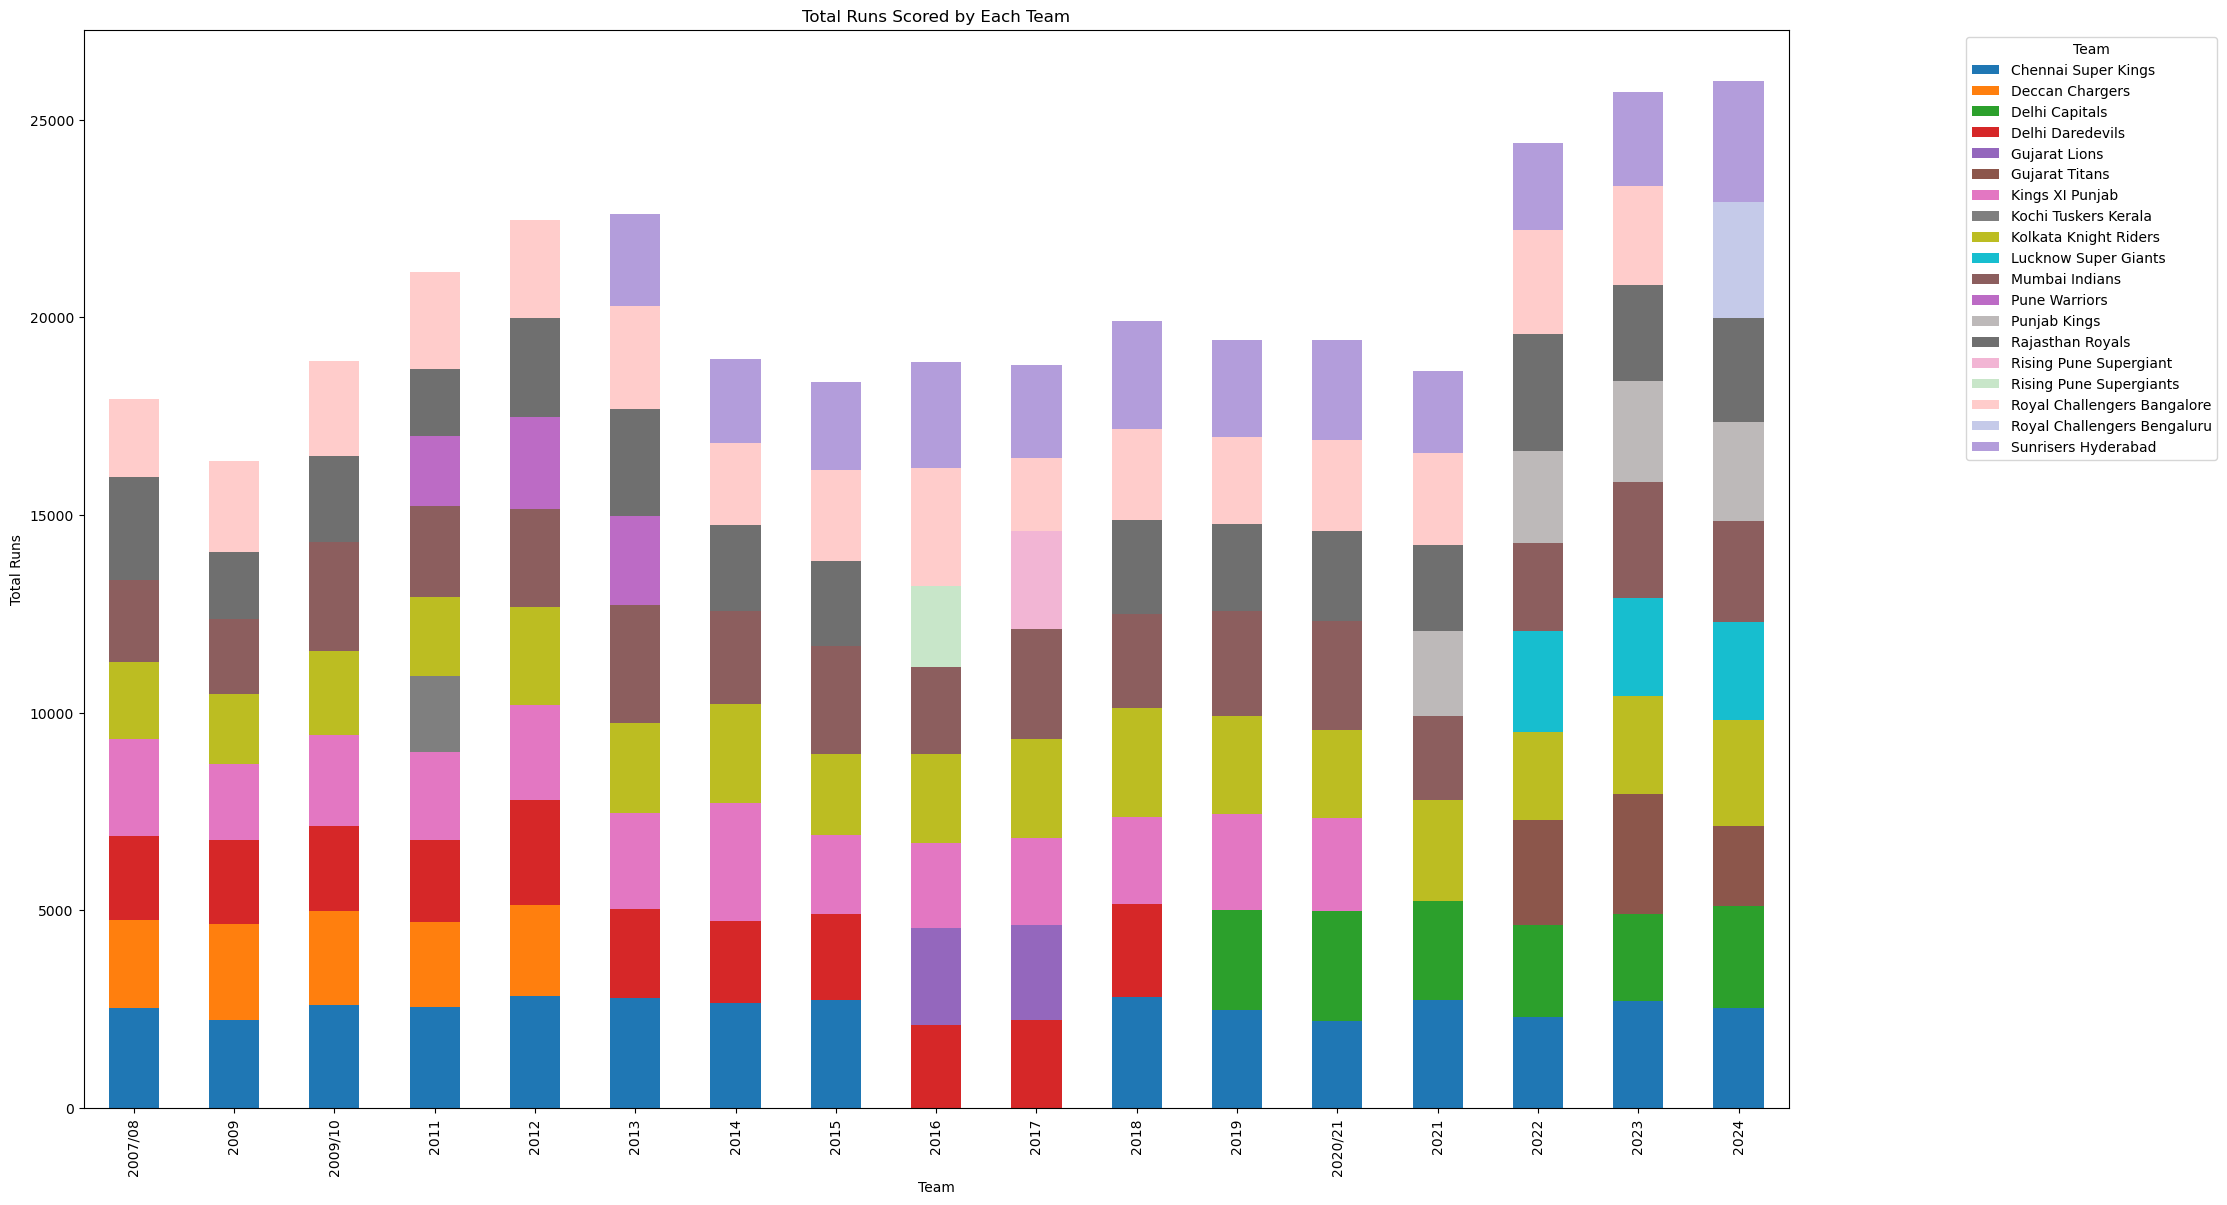

In [67]:
team_runs = combined_df.groupby(["season",'batting_team'])['total_runs'].sum().reset_index()
team_new_runs=team_runs.pivot(index="season",columns="batting_team",values="total_runs")
plt.figure(figsize=(14, 7))
#sns.barplot(data=team_runs, x='season', y='total_runs',hue="batting_team", palette='Set2')
team_new_runs.plot(kind="bar",stacked=True,figsize=(22, 14), color=palette)
plt.title('Total Runs Scored by Each Team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.legend(title='Team', bbox_to_anchor=(1.1, 1), loc='upper left')
plt.show()



+ The above chart is a stacked bar chart of each all the team of each seson by total_score on the y axis

### Comparison of Wins by Team (Total Wins across Seasons)

<Figure size 1400x700 with 0 Axes>

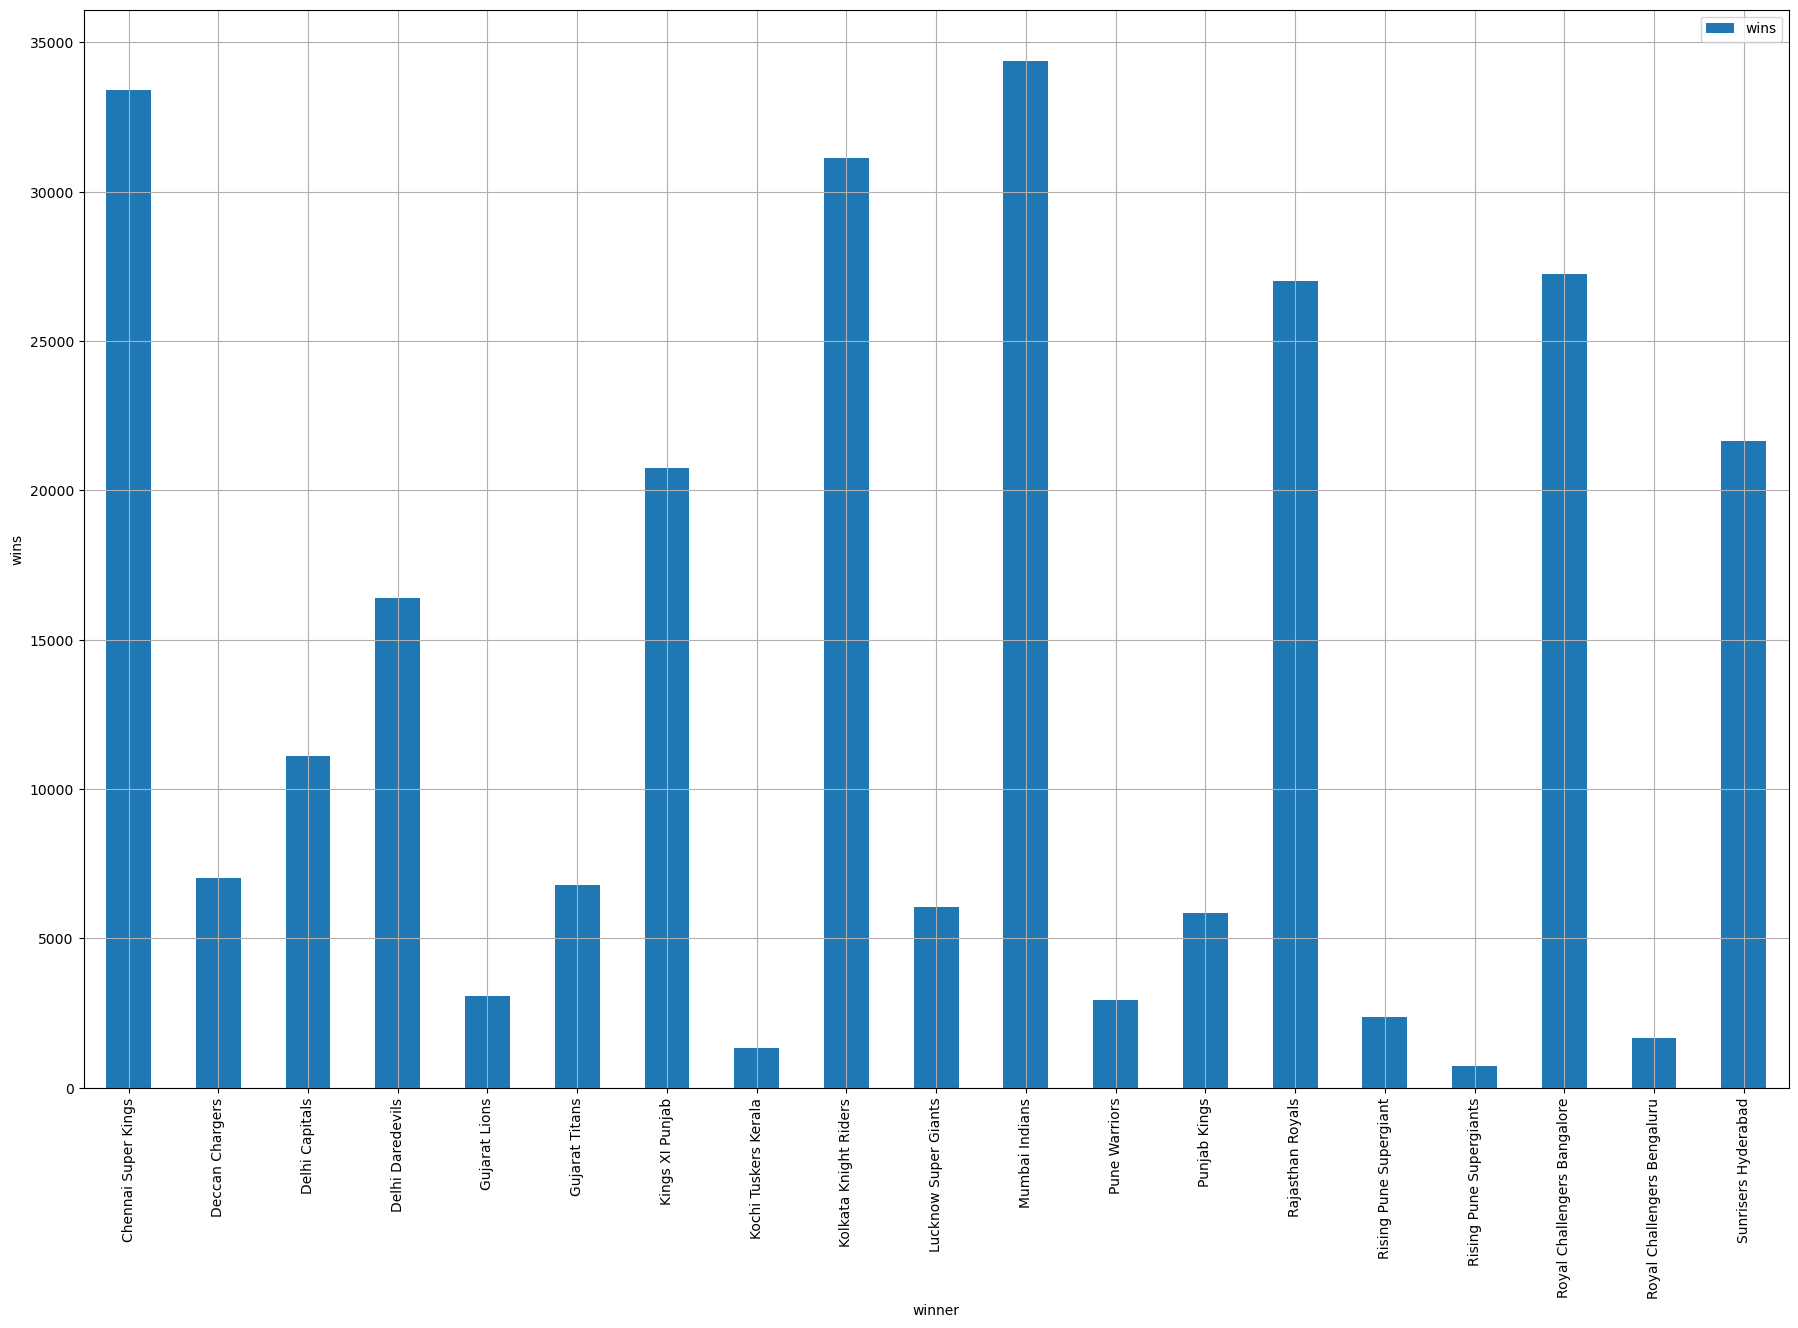

In [68]:
team_wins=combined_df.groupby("winner").size().reset_index(name="wins")
team_wins.set_index("winner",inplace=True) # to plot using the first # index must be set to winner to get team names
plt.figure(figsize=(14,7))

team_wins.plot(kind="bar",figsize=(22,14))
#sns.barplot(data=team_wins, x='winner', y='wins', palette='Set2')
plt.xlabel("winner")
plt.ylabel("wins")
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

+ The above graph tells us about the total number of wins of all the team throughout the career
+ mumbai indians,chennai superkings and kolkatta knigh riders have won the most number of matches with mumbai indias slightly leading
+ rising pune super giants and royal chalengers bengaluru have the least number of wins

###  Player Contributions: Runs Scored by Player (top 10 players since lot of players are there)

<Figure size 1400x700 with 0 Axes>

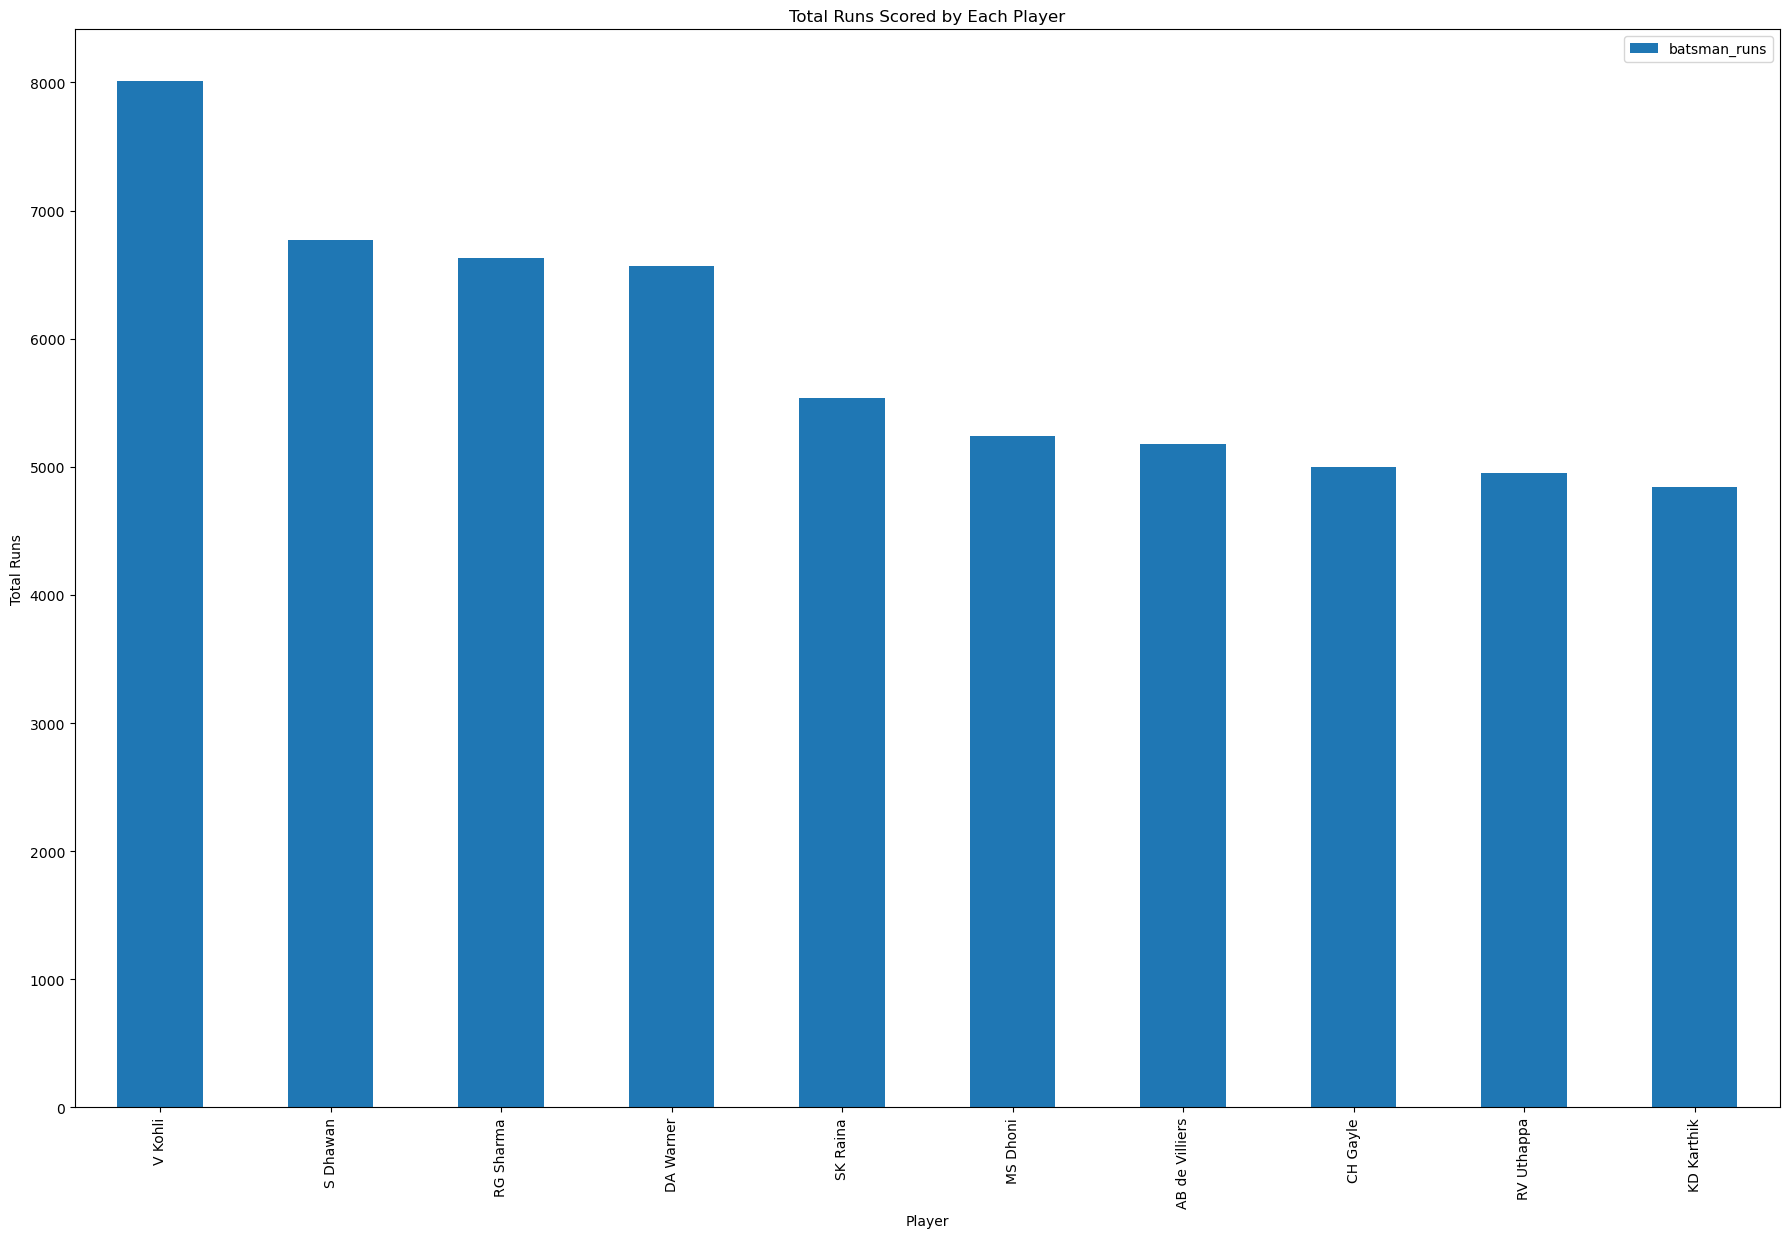

In [69]:
# Total runs by player
player_runs = combined_df.groupby('batter')['batsman_runs'].sum().reset_index()
player_runs.set_index("batter",inplace=True)
player_runs.sort_values(by="batsman_runs",ascending=False,inplace=True)


# Plotting runs by player
plt.figure(figsize=(14, 7))
player_runs.head(10).plot(kind="bar",figsize=(22,14)) # since lot of players are there it is difficult to visualize all
#sns.barplot(data=player_runs.head(10), x='batter', y='batsman_runs', palette='Set2')
plt.title('Total Runs Scored by Each Player')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()


+ the best player  throughout all seasons is v.kohli,followed by shikhar dhawan and RG Sharma

### 4. Boxplot to Analyze Distributions

C:\Users\santosh\AppData\Local\Temp\ipykernel_13168\2797913667.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined_df.head(100), x='batter', y='batsman_runs', palette='Set2')


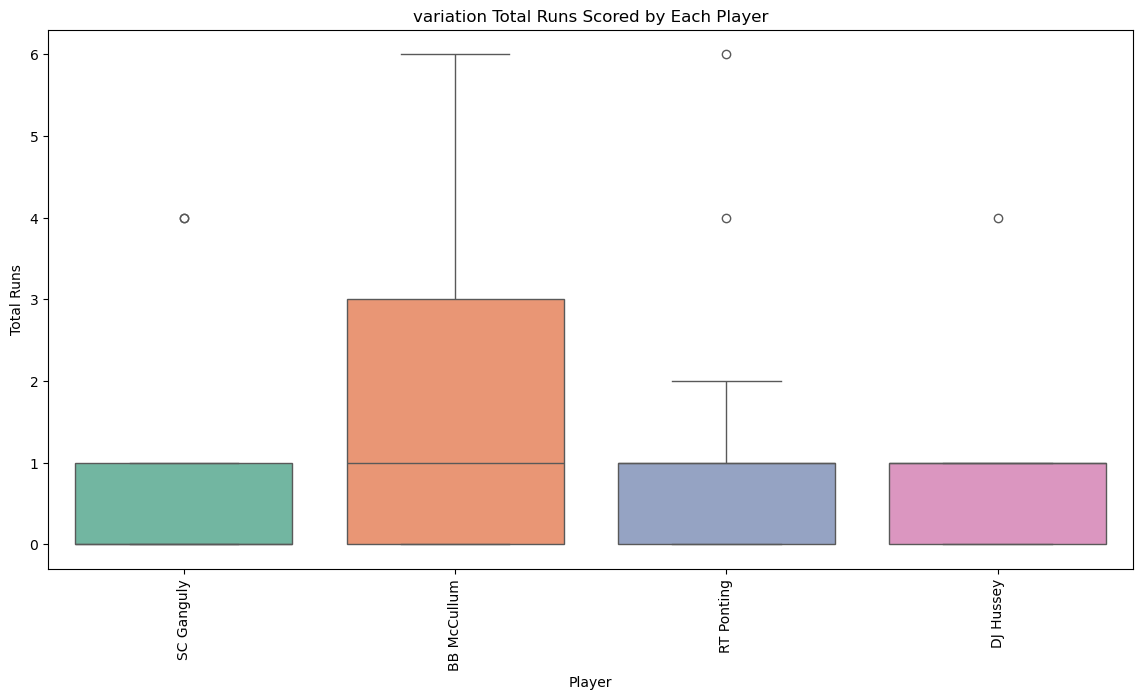

In [70]:
# Total runs by player
#player_runs = combined_df.groupby('batter')['batsman_runs'].sum().reset_index()
#player_runs.set_index("batter",inplace=True)
#player_runs.sort_values(by="batsman_runs",ascending=False,inplace=True)


# Plotting runs by player
plt.figure(figsize=(14, 7))
#player_runs.head(10).plot(kind="box",figsize=(22,14)) # since lot of players are there it is difficult to visualize all
sns.boxplot(data=combined_df.head(100), x='batter', y='batsman_runs', palette='Set2')
plt.title('variation Total Runs Scored by Each Player')
plt.xlabel('Player')
plt.ylabel('Total Runs')
plt.xticks(rotation=90)
plt.show()

+ the above graph shows the variation in runns hit per ball by players from the first 100 observations of dataframe
+ mccullum has the best average and is consistently hitting boundaries and scoring runs


###  Heatmap for Runs by Player and Season

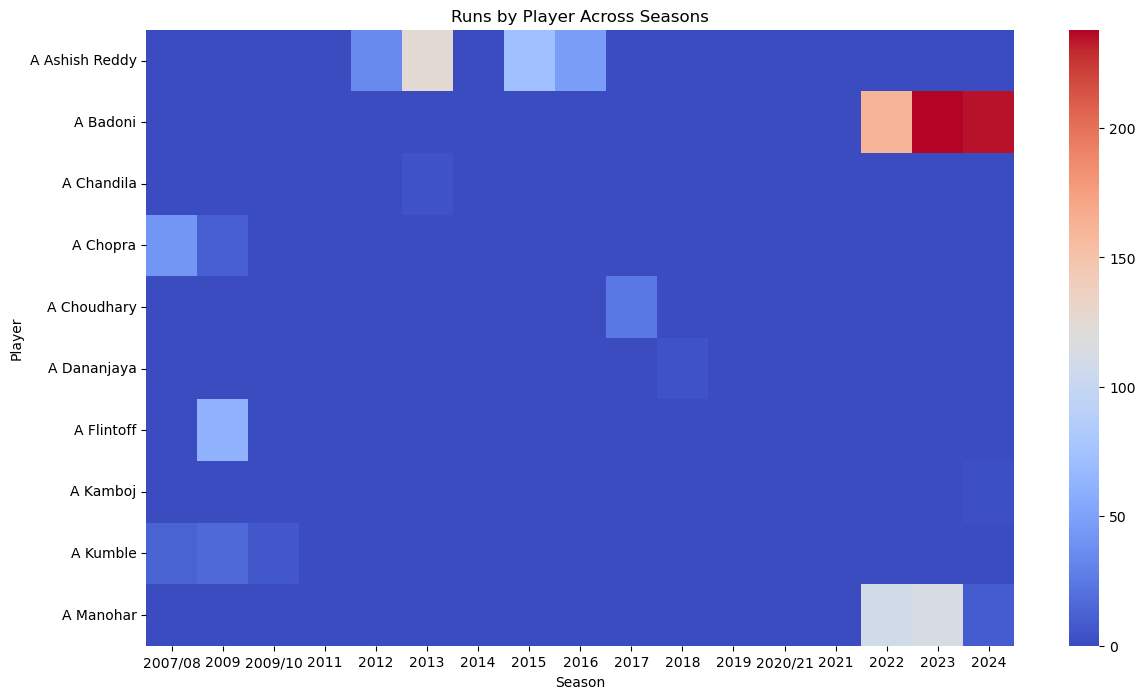

In [71]:
# Runs by player and season
player_season_runs = combined_df.groupby([ "batter","season"])['batsman_runs'].sum().unstack(fill_value=0)


# Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(player_season_runs.head(10), cmap='coolwarm', annot=False, cbar=True)
plt.title('Runs by Player Across Seasons')
plt.xlabel('Season')
plt.ylabel('Player')
plt.show()


+ the above heat map shows variations of runs scored by 10 players in different seasons
+ this is similar to stacked bar map
+ badoni scored highest amount of runs in 2023,2024 picking up his form from 2022
+ ashsih reddy perfromed well in 2012, 2013 with a drop in 2014 and then giving a comeback in 2015 and 2016
+ chopra started well in 2007 but his performance dropped in the next seasongs
+ flintoff scored best in 2009
+ kumble showed slight promise in the initial threee seasons but was a dissapooint for the remaning career
+ manohar is started low from the start but gave significant performances between 2022 and 2023

# Distributions:
## ■ Analyze numerical variables using histograms, box plots, or density plots.

In [72]:

combined_df.select_dtypes("number").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   result_margin  260920 non-null  float64
 1   target_runs    260920 non-null  float64
 2   target_overs   260920 non-null  float64
 3   inning         260920 non-null  int64  
 4   over           260920 non-null  int64  
 5   ball           260920 non-null  int64  
 6   batsman_runs   260920 non-null  int64  
 7   extra_runs     260920 non-null  int64  
 8   total_runs     260920 non-null  int64  
dtypes: float64(3), int64(6)
memory usage: 17.9 MB


# histograms

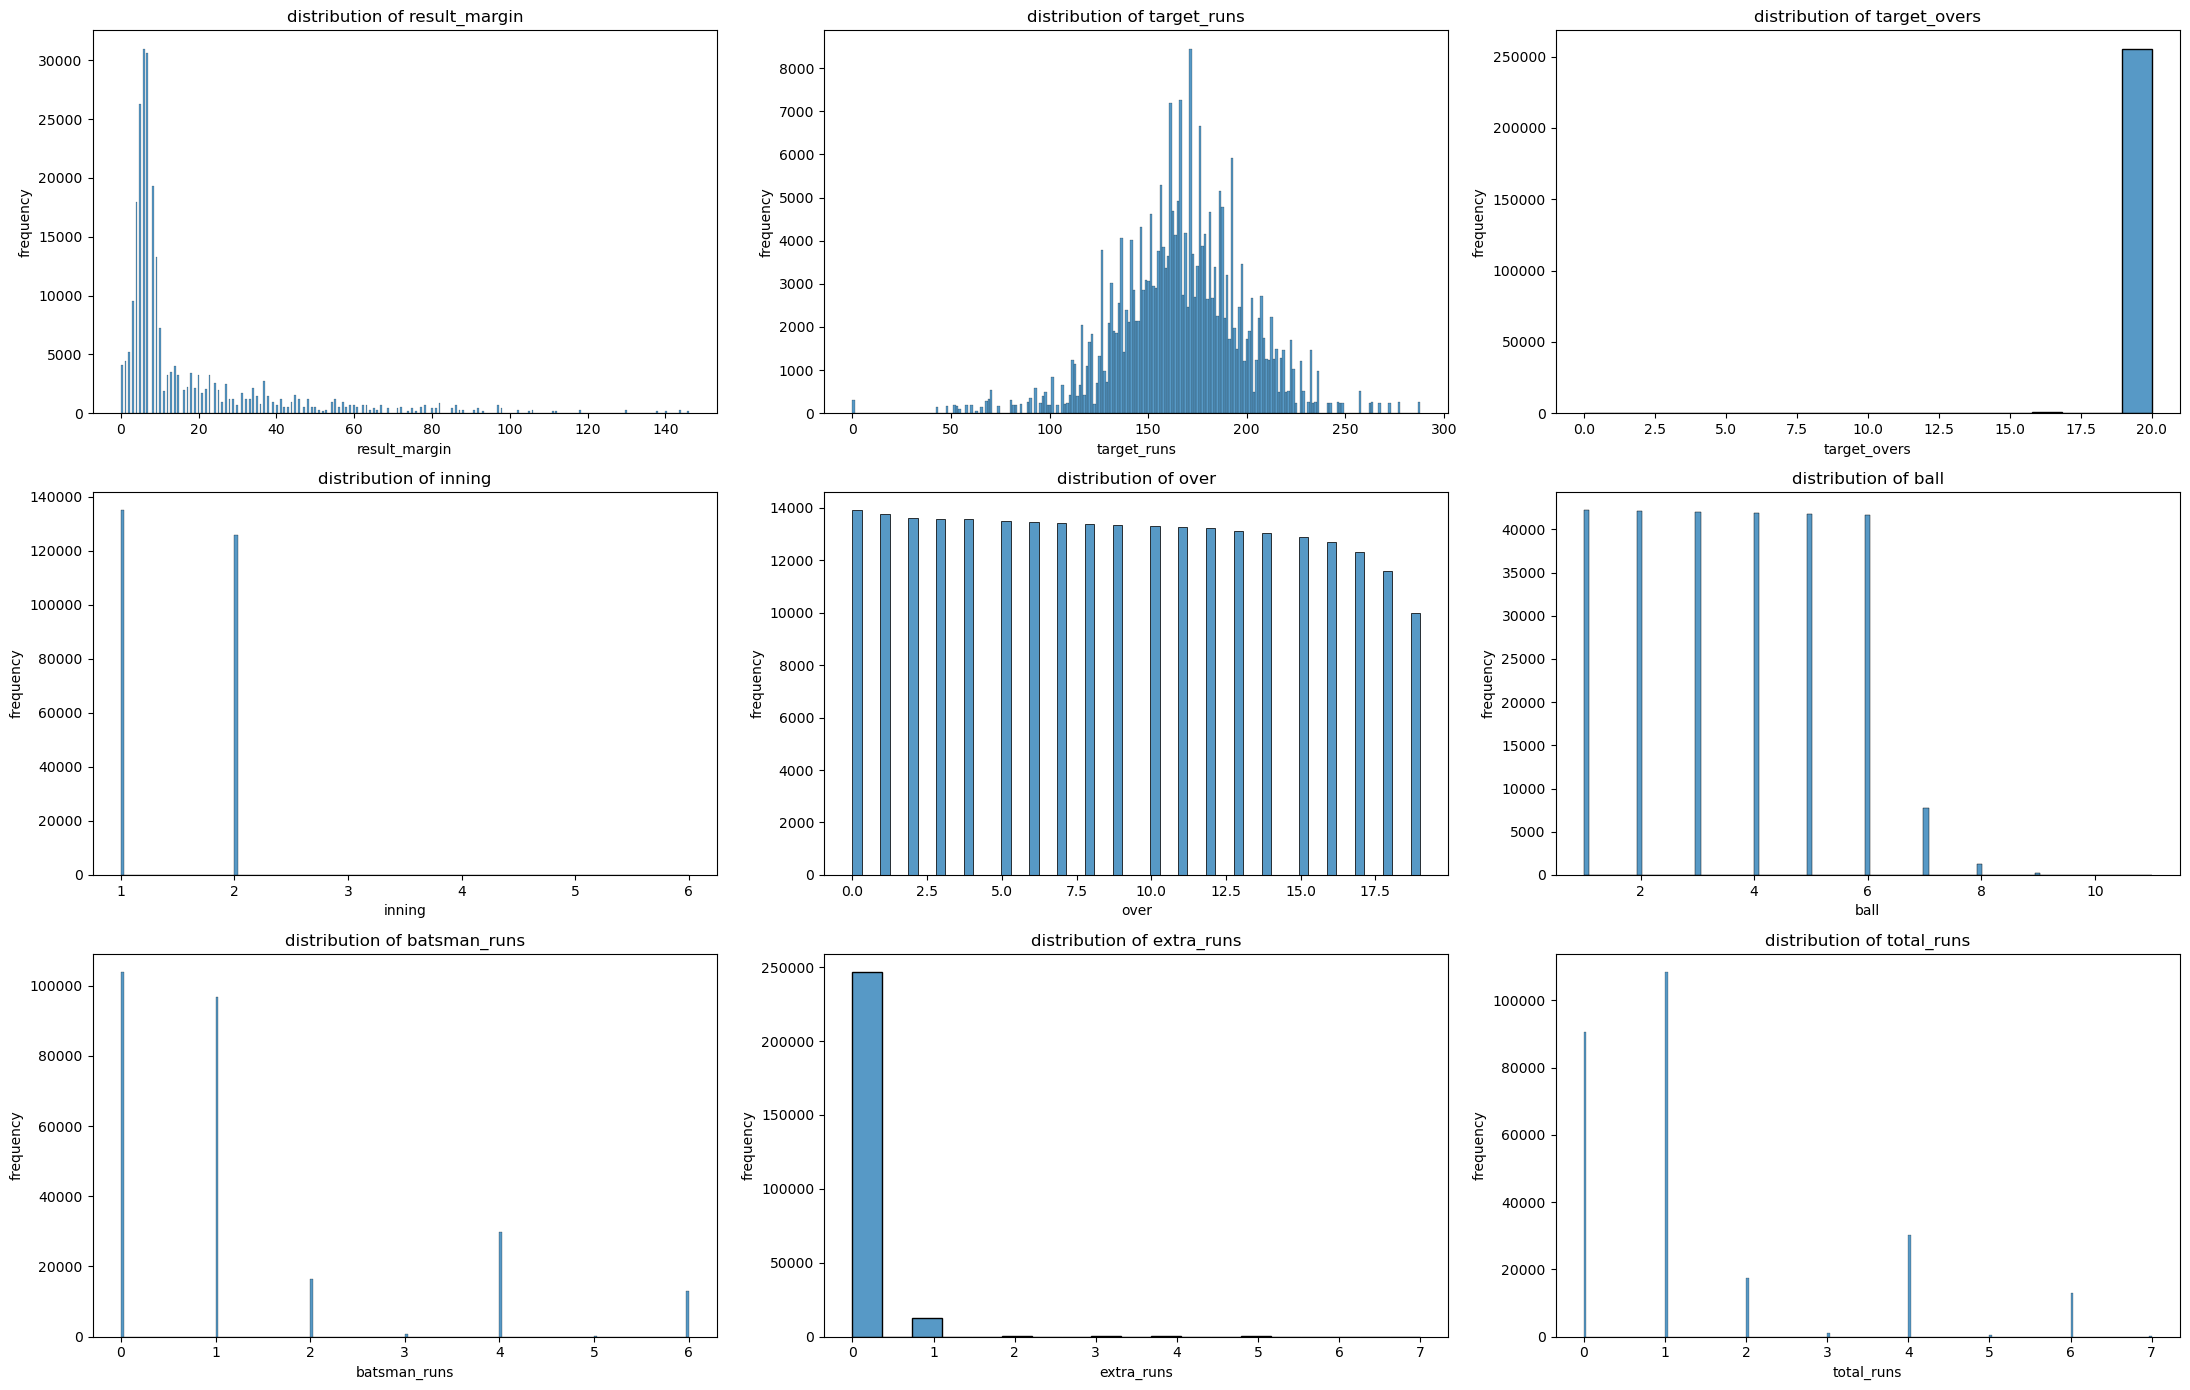

In [73]:
numeric_columns=combined_df.select_dtypes("number").columns
#print(numeric_columns)

plt.figure(figsize=(22,14))

for i,j in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.histplot(data=combined_df,x=j,kde=False)
    plt.title(f"distribution of {j}")
    plt.xlabel(j)
    plt.ylabel("frequency")
plt.tight_layout()
plt.show()






+ the above combination od graphs contain the freuqncy distribution of all the numeric columns of the the dataframe
+ result margin is right skewed indication mean>median>mode of the data, majority of data between 0 and 10 with a few outliers like 140
+ innings have difference between 1 and 2 indicating that few times the match was inconclusive after the first innings
+  we see a decline in overs as we go towards right indicating few of matches ended before the 20 th over
+  balls indicate that there have been few situations where the extra balls had to balled due to extras given
+ batsman runs indicate that batsmen mostly played dots or singles with a few converting them into 2 and boundaries while getting 3 runs is a very rare event
+ a very few extras have been given in the form of wides and noballs legbyes ect but on some rare occasions we see 2's,3's,4's and 5;s too


## boxplots for outliers

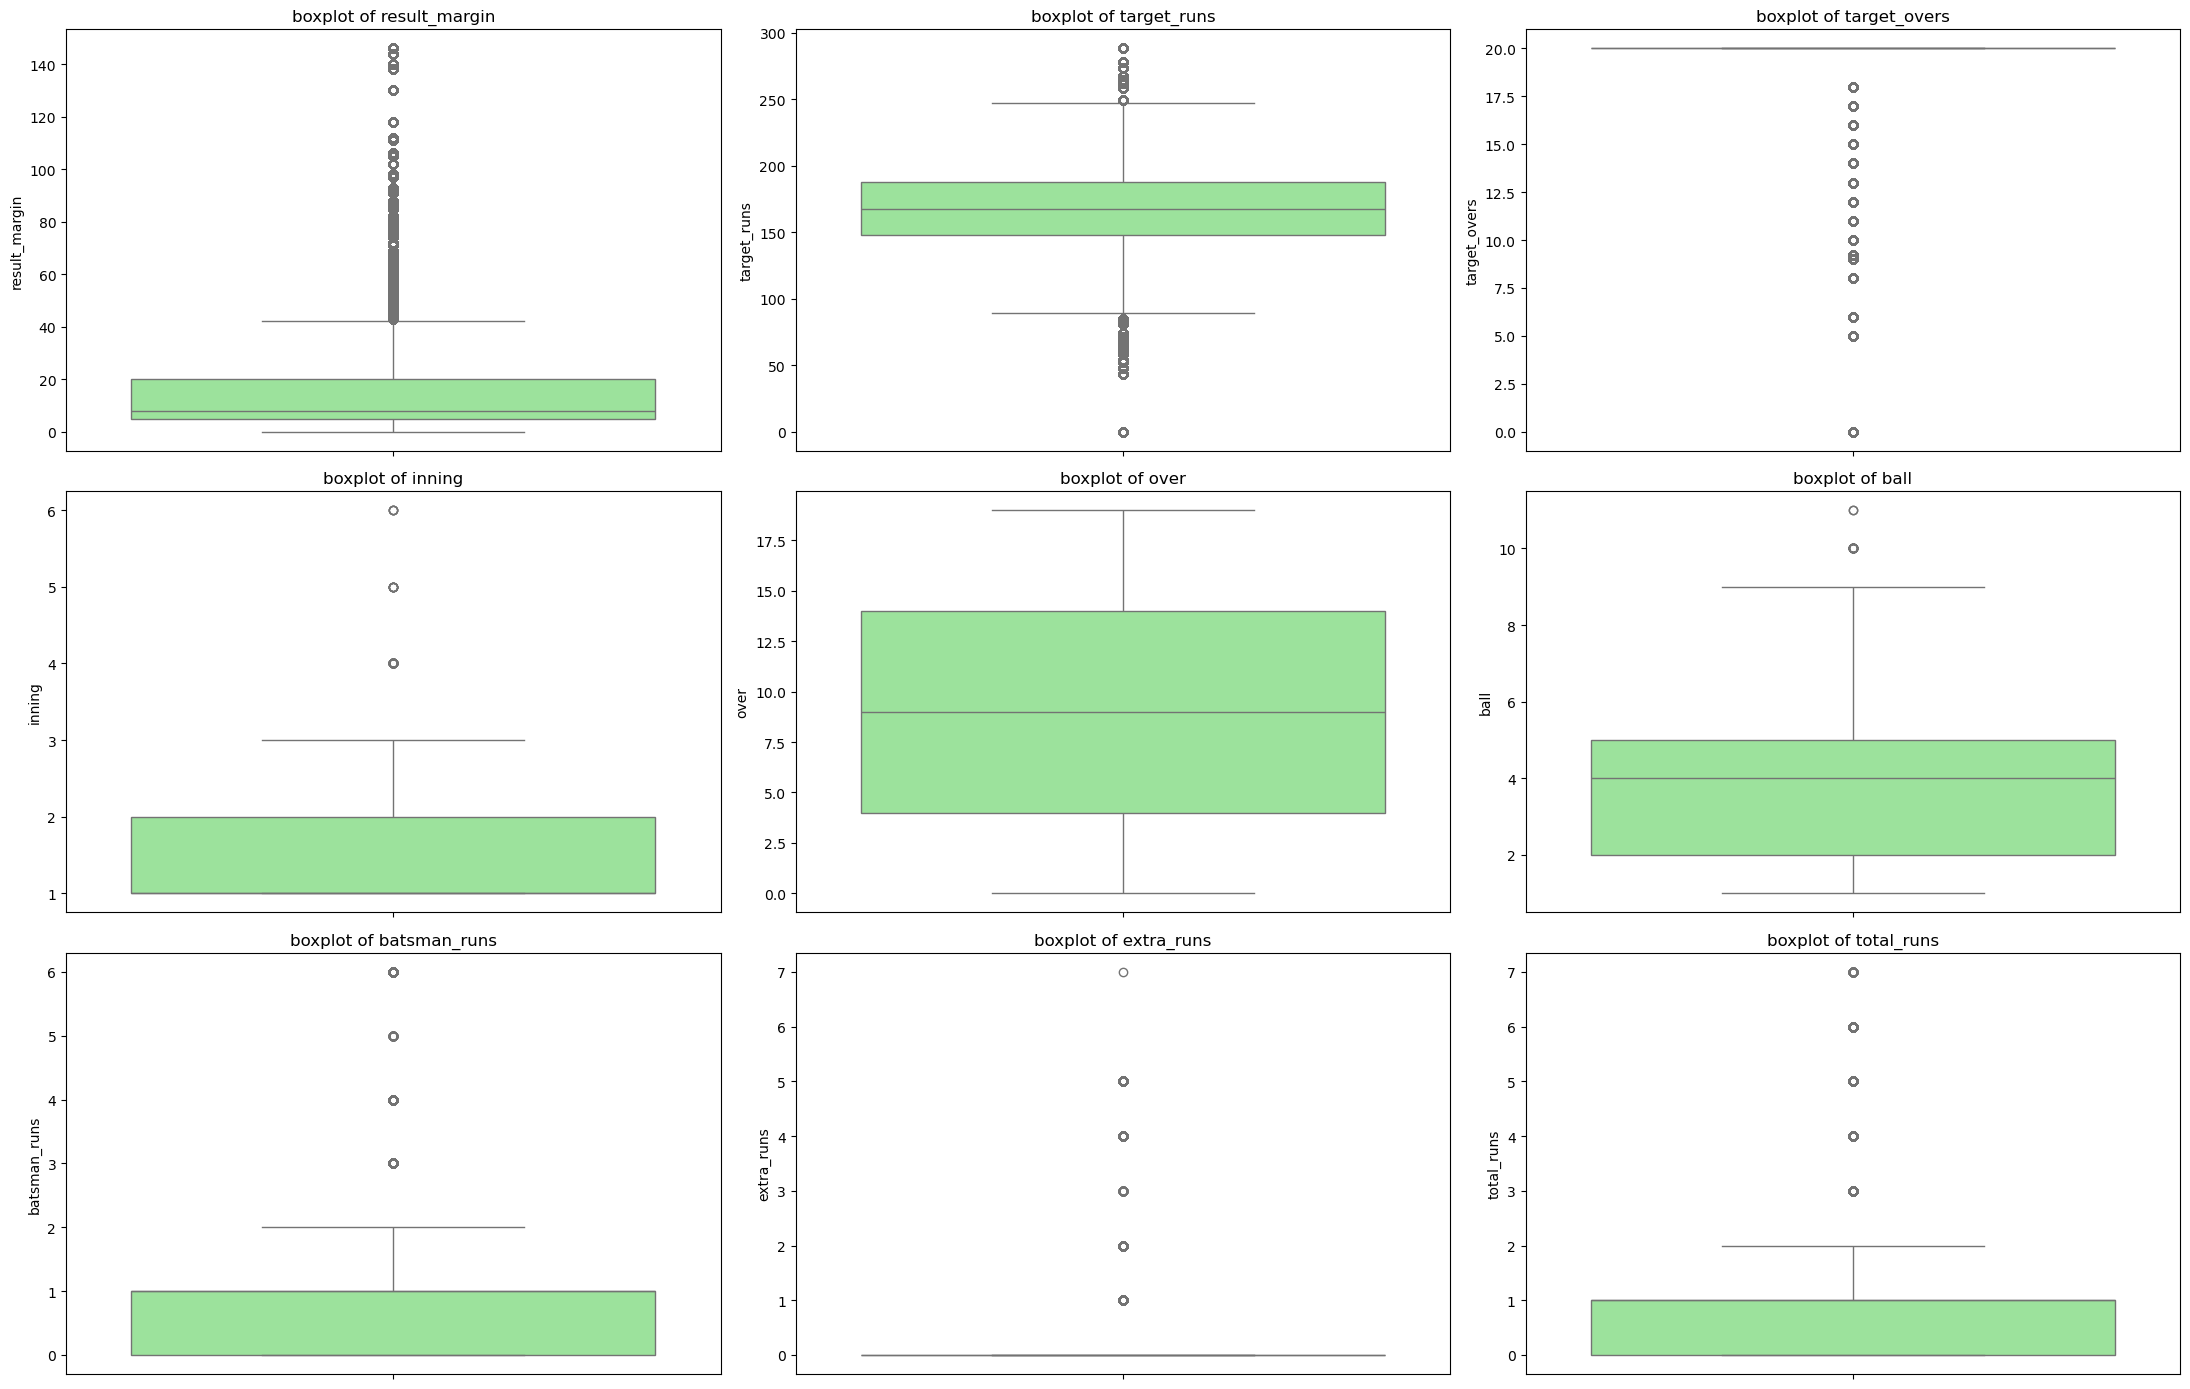

In [74]:
numeric_columns=combined_df.select_dtypes("number").columns
#print(numeric_columns)

plt.figure(figsize=(22,14))

for i,j in enumerate(numeric_columns):
    plt.subplot(3,3,i+1)
    sns.boxplot(data=combined_df,y=j,color="lightgreen")
    plt.title(f"boxplot of {j}")
    plt.ylabel(j)
    
plt.tight_layout()
plt.show()

+ on an average teams won by a margin between 0 to 20 runs,but there are a lot of instances where team won by a marjin of 40 and above with some even reaching
 140
+ on an average teams gave a target between 150 and 200 runs,but there a many insances where target were as low as below 100 and as high as above 250
+ on a average teams ahd to chase the target in 20 overs but in some instances due to some conditions the overs were reduced from 18 to even 5 and 
sometimes even 0
+ batsmen scored 1's and 2's on an average with a few instances of boundaries also
+ there are instance where more than 8 balls were bowled per over with an average of alteast 4 bowls bowled
+ batsmen mainly played dots balls and took singles with occasional boundaried and 3's along with 5's
+ there are instances where bowlers gave extras in the form of1's,2's,3's,4's,5's,and sometimes 7 too
+ total_runs scored by batsmen in a single bowl sometimes fluctuated in the range of 3 to 7


# Pair Plot for Relationships


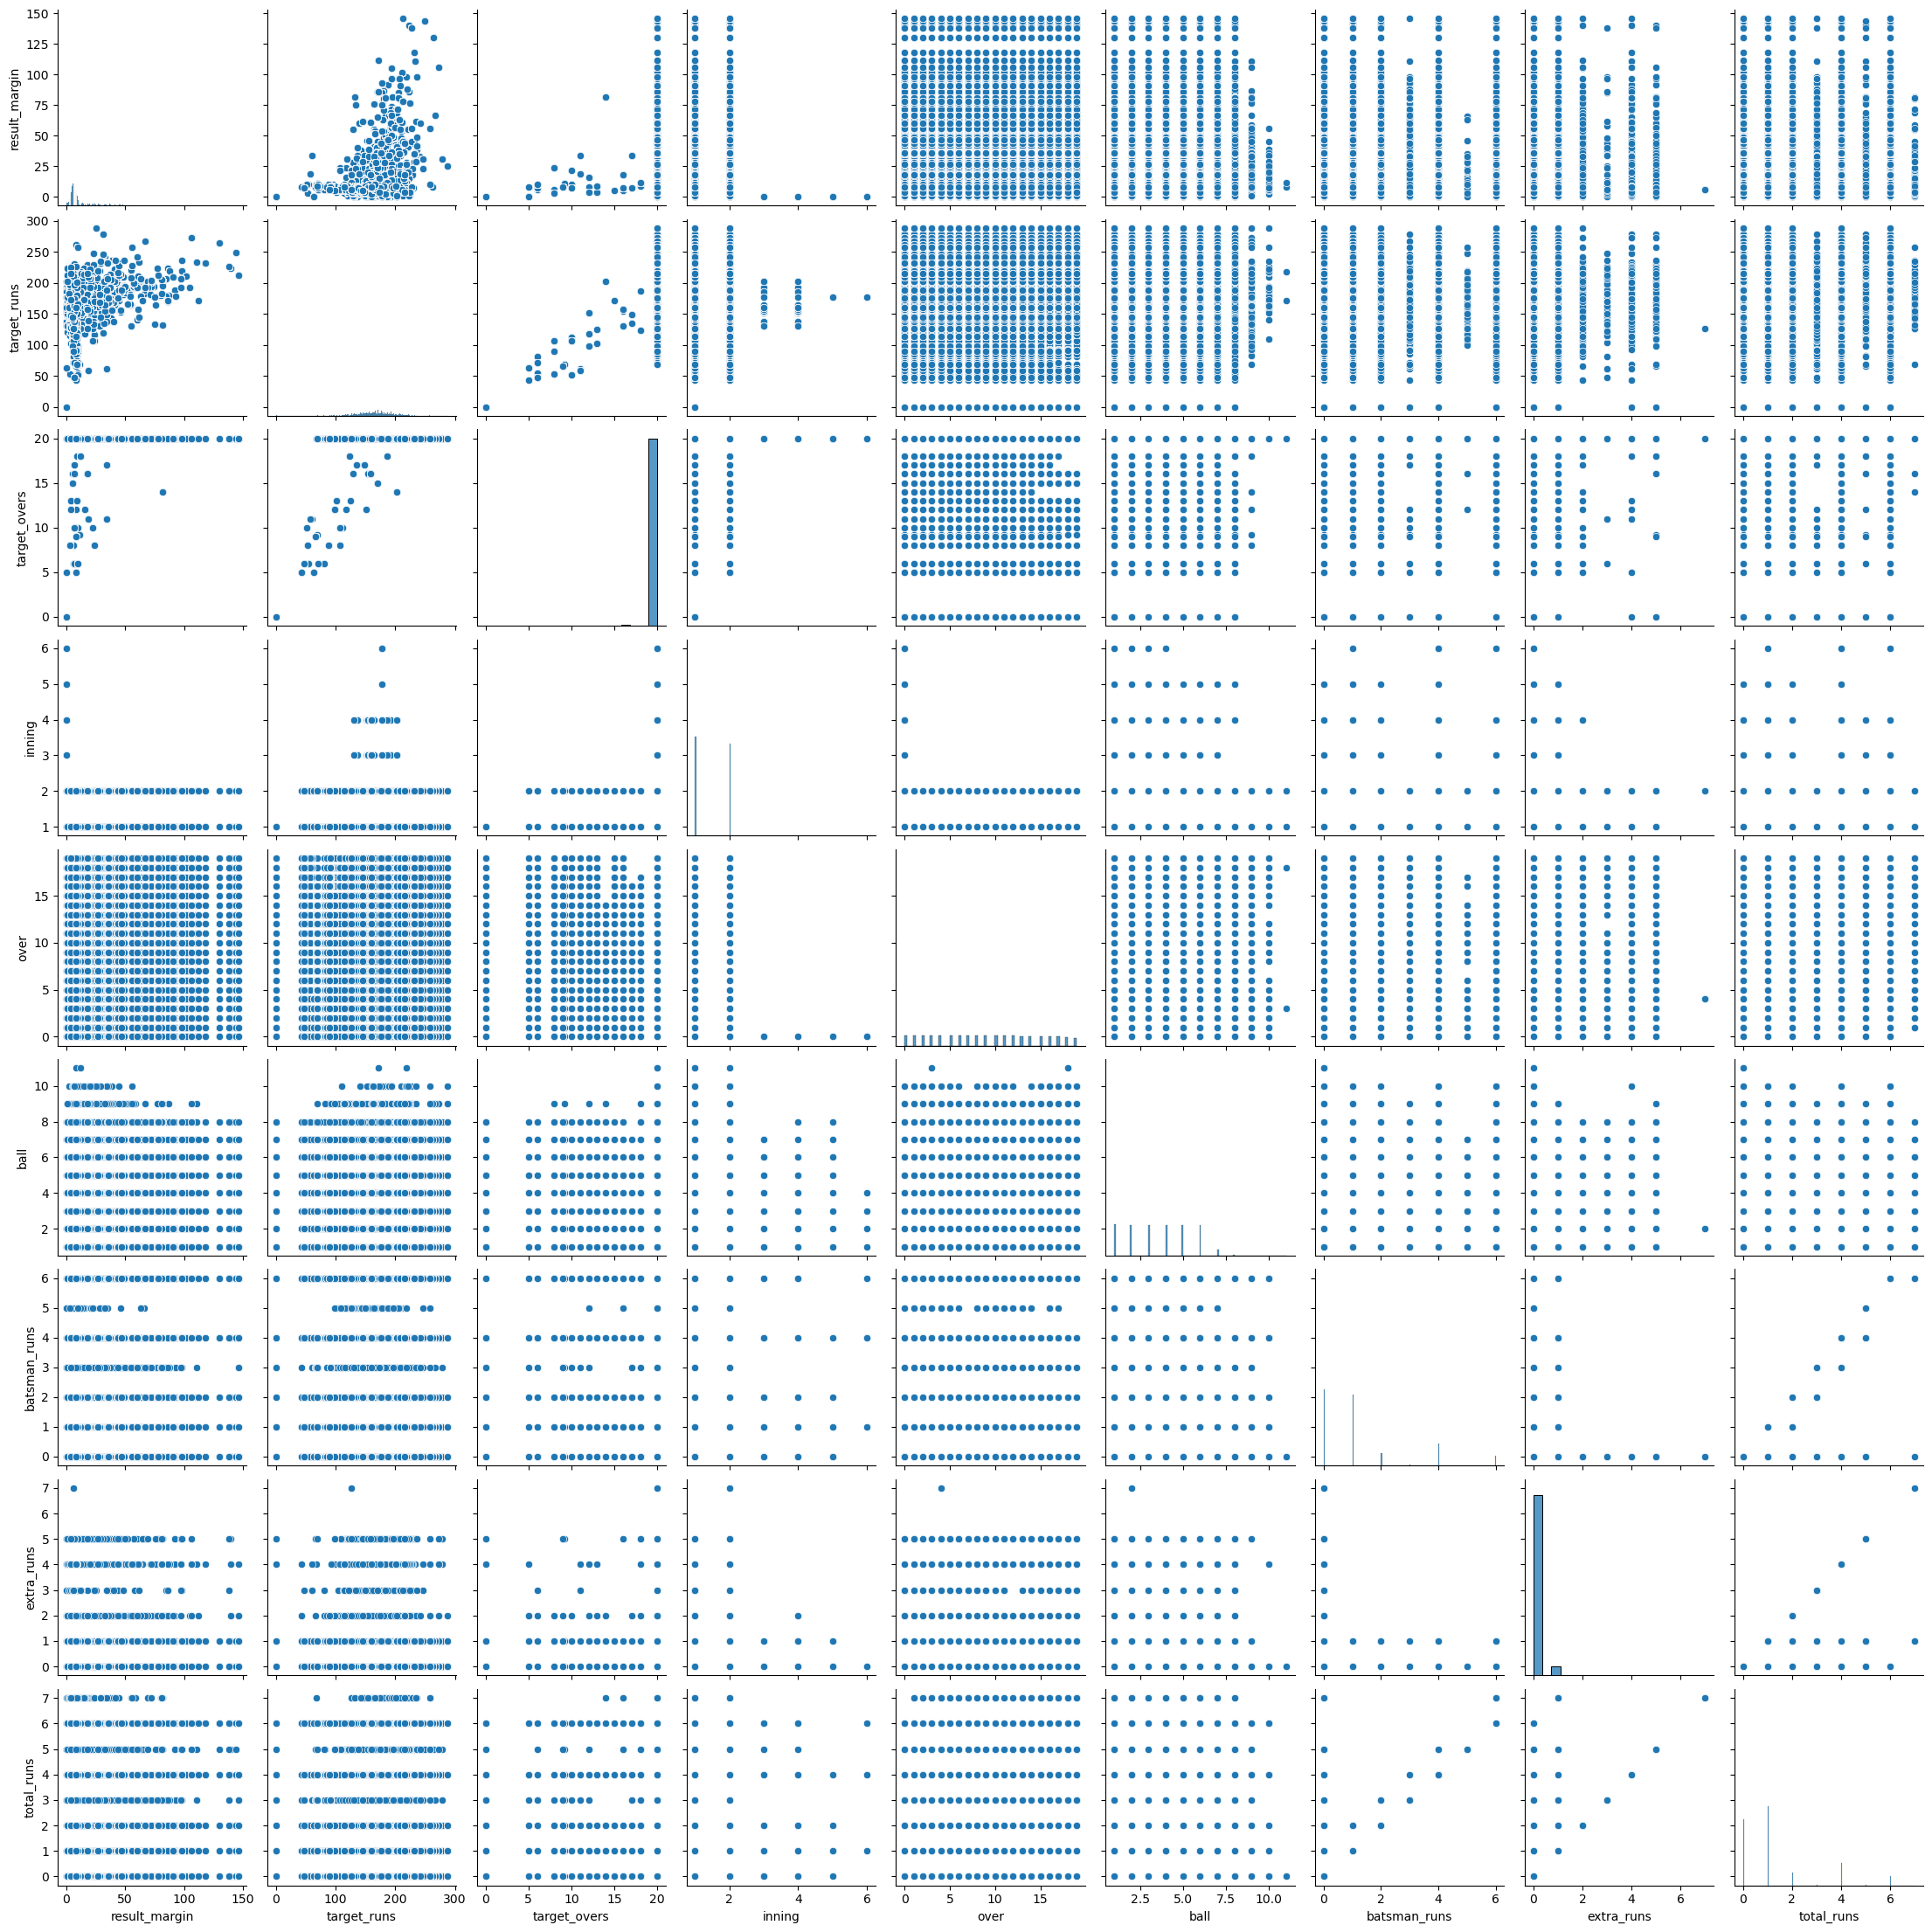

In [75]:
sns.pairplot(combined_df[numeric_columns])
plt.show()

+ let's zoom in on the areas where there is a possible correlation from this pairplot


### Target Runs vs. Result Margin

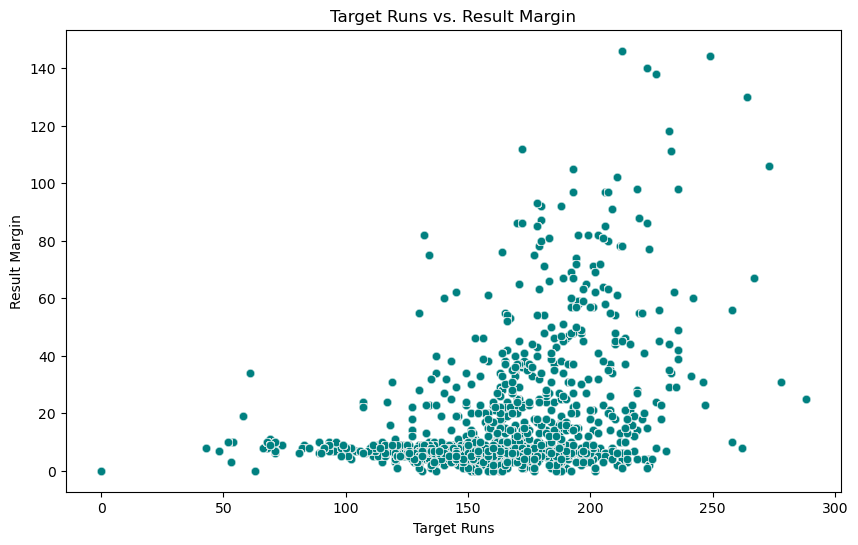

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='target_runs', y='result_margin', alpha=0.5, color='teal')

plt.title('Target Runs vs. Result Margin')
plt.xlabel('Target Runs')
plt.ylabel('Result Margin')
plt.show()

#### General Trend:

+ As the target runs increase, the result margin (likely the margin of victory in terms of runs) also tends to increase. This indicates that teams setting higher targets often win by larger margins.

#### Clustered Points:

+ A significant number of matches have target runs in the range of 150-200, and the result margins are mostly below 40 runs in these cases.
This suggests that these target scores are quite common and often lead to close contests.

#### Outliers:

+ There are a few matches where the result margin is very high (above 100 runs) for targets exceeding 200 runs. These are likely dominant performances by teams setting very high targets.

#### Low Target, Low Margin:

+ For target runs below 100, the result margins are very small. This is expected as low scores usually result in close finishes or losses for the batting team.

#### Strategy Insights:

+ Teams defending higher targets (above 200 runs) often have a greater chance of securing a large-margin victory.
On the other hand, when the target is modest (below 150 runs), the matches tend to be competitive with smaller result margins.

## Heatmap of Correlations

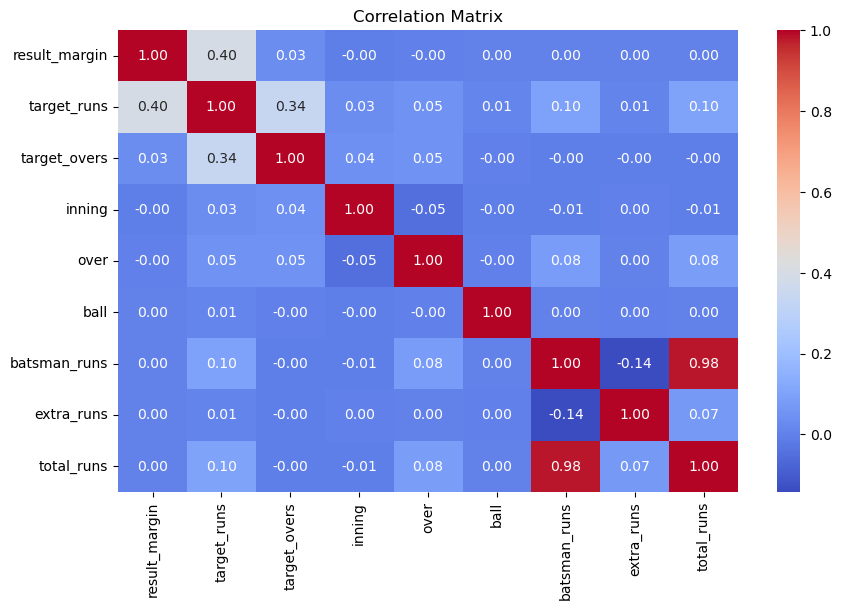

In [77]:
plt.figure(figsize=(10, 6))
corr = combined_df[numeric_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


+ it's better to use heatmaps for correlation analysis and pairplot afterwards so that we can filter oo=ut more efficiently

+ target runs and result margin have a moderate positve correlation meaning as target runs increases result margin increases
+ target overs and target runs have a moderate positive relationship indicating as target overs increase target runs increase
+ extra runs and batsmen runs have weak negative relationship indicating as batsmen runs increase extra runs decrease
+ batsmen runs and total runs have a very strong positive relationhip indicating and batsmen runs increase total runs increase

# Relationships:
## Use scatter plots or pair plots to explore correlations.
## Identify relationships between variables such as runs scored and match outcomes
## (IPL) or pricing and sales (Retail).

In [78]:
combined_df.columns
combined_df.iloc[:,:16].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               260920 non-null  object        
 1   season           260920 non-null  object        
 2   city             260920 non-null  object        
 3   date             260920 non-null  datetime64[ns]
 4   match_type       260920 non-null  object        
 5   player_of_match  260920 non-null  object        
 6   venue            260920 non-null  object        
 7   team1            260920 non-null  object        
 8   team2            260920 non-null  object        
 9   toss_winner      260920 non-null  object        
 10  toss_decision    260920 non-null  object        
 11  winner           260920 non-null  object        
 12  result           260920 non-null  object        
 13  result_margin    260920 non-null  float64       
 14  target_runs      260

In [79]:
combined_df.iloc[:,16:35].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   super_over        260920 non-null  object
 1   method            260920 non-null  object
 2   umpire1           260920 non-null  object
 3   umpire2           260920 non-null  object
 4   inning            260920 non-null  int64 
 5   batting_team      260920 non-null  object
 6   bowling_team      260920 non-null  object
 7   over              260920 non-null  int64 
 8   ball              260920 non-null  int64 
 9   batter            260920 non-null  object
 10  bowler            260920 non-null  object
 11  non_striker       260920 non-null  object
 12  batsman_runs      260920 non-null  int64 
 13  extra_runs        260920 non-null  int64 
 14  total_runs        260920 non-null  int64 
 15  extras_type       260920 non-null  object
 16  is_wicket         260920 non-null  obj

## 1. Scatter Plot: target_runs vs. Result Margin

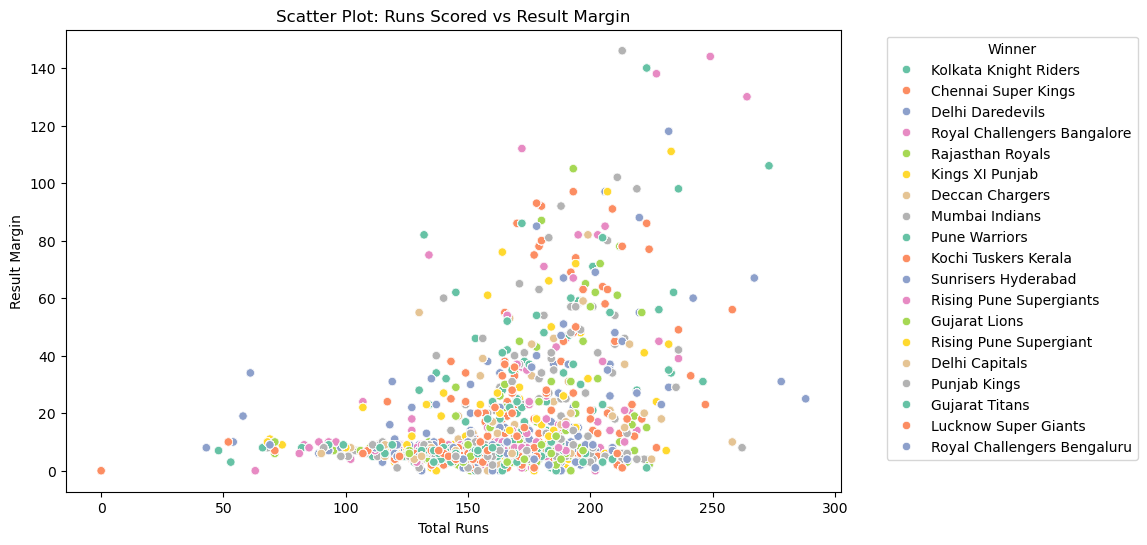

In [80]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_df, x='target_runs', y='result_margin', hue='winner', palette='Set2')
plt.title('Scatter Plot: Runs Scored vs Result Margin')
plt.xlabel('Total Runs')
plt.ylabel('Result Margin')
plt.legend(title='Winner',bbox_to_anchor=(1.05,1),loc="upper left")
plt.show()



+ the above has already been plotted before in this project

## Runs Scored by Batting Team and runs scored against each team


In [81]:
# Total runs scored by each team (batting team) and match outcome (winner)
team_runs_outcome = combined_df.groupby(['batting_team', 'winner'])['total_runs'].sum().unstack().fillna(0)
team_runs_outcome.head()
#PIVOTING THE DATA EITHER THROUGH SNS.PIVOT OR THROUGH UNSTACK LIKE WHAT WE DID IN THIS IS NECESSARY FOR A CLEAR PLOTTING



winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Gujarat Titans,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Lucknow Super Giants,Mumbai Indians,Pune Warriors,Punjab Kings,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Royal Challengers Bengaluru,Sunrisers Hyderabad
batting_team,,,,,,,,,,,,,,,,,,,
Chennai Super Kings,23396.0,606.0,805.0,818.0,0.0,676.0,1559.0,131.0,1500.0,596.0,2866.0,290.0,798.0,2112.0,0.0,0.0,1322.0,191.0,963.0
Deccan Chargers,766.0,4598.0,0.0,1152.0,0.0,0.0,1140.0,0.0,1027.0,0.0,772.0,136.0,0.0,1133.0,0.0,0.0,739.0,0.0,0.0
Delhi Capitals,968.0,0.0,7932.0,0.0,0.0,319.0,316.0,0.0,911.0,481.0,1235.0,0.0,310.0,669.0,0.0,0.0,658.0,140.0,961.0
Delhi Daredevils,1752.0,600.0,0.0,11426.0,171.0,0.0,1637.0,140.0,1852.0,0.0,1433.0,362.0,0.0,1561.0,0.0,162.0,2000.0,0.0,1200.0
Gujarat Lions,0.0,0.0,0.0,552.0,2172.0,0.0,293.0,0.0,183.0,0.0,335.0,0.0,0.0,0.0,161.0,0.0,454.0,0.0,712.0


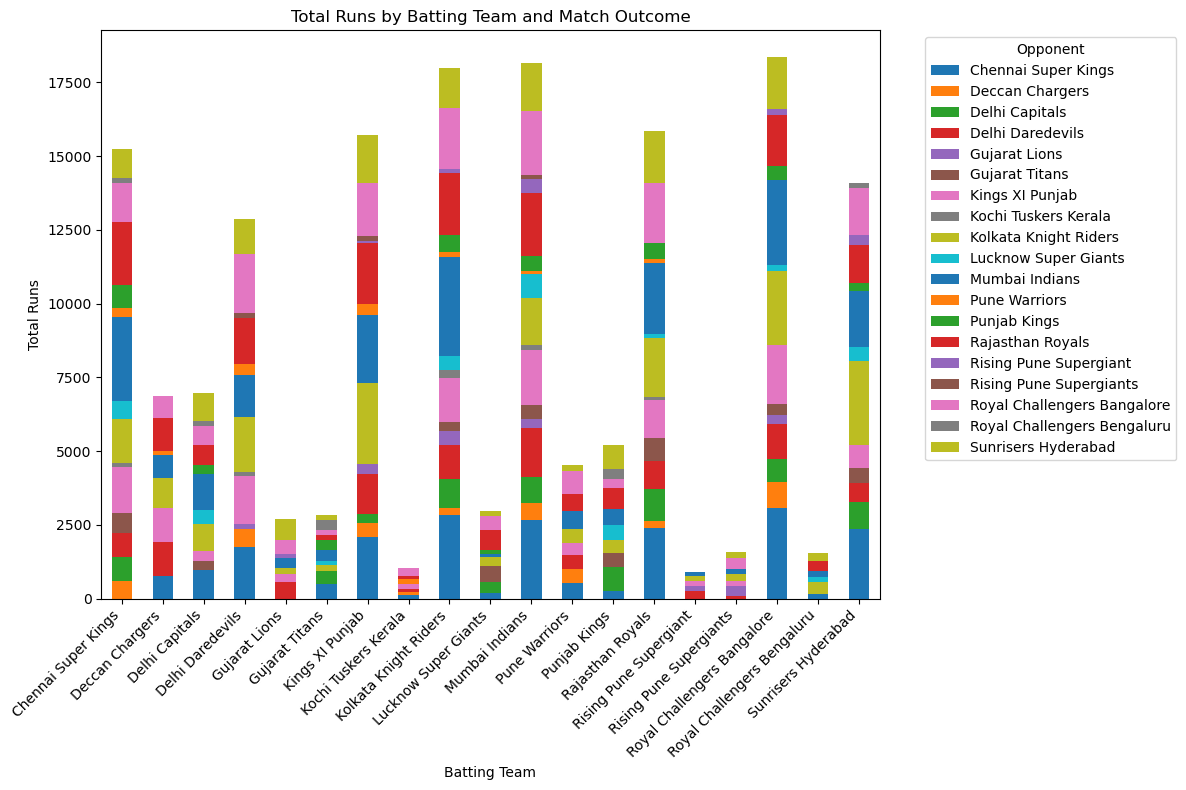

In [86]:
# Plotting
df_cleaned = team_runs_outcome.copy()

# Replace diagonal (where batting team == opponent) with NaN (or 0) 
for team in df_cleaned.index:
    df_cleaned.loc[team, team] = 0  # Alternatively, you could use df_cleaned.loc[team, team] = 0

# Step 2: Plotting
ax = df_cleaned.plot(kind='bar', stacked=True, figsize=(12, 8))

# Add labels and title
ax.set_title('Total Runs by Batting Team and Match Outcome')
ax.set_xlabel('Batting Team')
ax.set_ylabel('Total Runs')
plt.xticks(rotation=45, ha='right')

# Add a legend
plt.legend(title="Opponent", bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()


+ the above bar stacked bar chart shows the total runs scored by each team and the runs scored by each batting team against the opponents
+  for ex: in chennai super kings the first bar represents orange showing the runs they scored against deccan chargers.
+ from observation chennai scored the most against mumbai indians and the leas against royal challengers bengaluru.


In [85]:
combined_df.to_csv("combined.csv")

In [89]:
combined_df.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [92]:
combined_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,BB McCullum,0,1,1,legbyes,0,-,-,-
1,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
2,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,1,1,wides,0,-,-,-
3,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
4,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,P Kumar,SC Ganguly,0,0,0,-,0,-,-,-
